## Campinas jul/2017 e mai/2018

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta

from datetime import datetime

from scipy.stats import mannwhitneyu

### Nefelometro

Cerca de 30.000 linhas com valores Nan

In [3]:
nefe = pd.read_csv('data/Campinas-2017_Nephelometer_Aurora_Ecotech_3000_Level3_5min.csv', sep=';', header=1)
print(len(nefe))
nefe = nefe[nefe[' scat450 Mean (Mm-1)']!= ' NaN']#remove linhas com valores nulos na coluna
nefe = nefe[nefe[' scat525 Mean (Mm-1)']!= ' NaN']#remove linhas com valores nulos na coluna
nefe = nefe[nefe[' scat635 Mean (Mm-1)']!= ' NaN']#remove linhas com valores nulos na coluna  
nefe = nefe.reset_index()
print(len(nefe))
time= pd.to_datetime(nefe[' UnixTime(UTC)'],unit='s')
nefe = nefe.drop('Time(UTC)', axis=1)
nefe['Time(UTC)'] = time
# Definindo a coluna de nefe e hora como índice
nefe.set_index('Time(UTC)', inplace=True)

for column in nefe.columns:
    nefe['%s'%(column)] = nefe['%s'%(column)].astype(float)

nefe = nefe[nefe[' scat525 Mean (Mm-1)'] <= 900]#remove linhas com valores nulos na coluna
nefe.index = nefe.index - timedelta(hours=3)


# Separando os valores para o gráfico
orange = nefe[' scat635 Mean (Mm-1)']
green = nefe[' scat525 Mean (Mm-1)']
blue = nefe[' scat450 Mean (Mm-1)']

96481
62655


In [4]:
(96481 -62655)/96481

0.3505975269742229

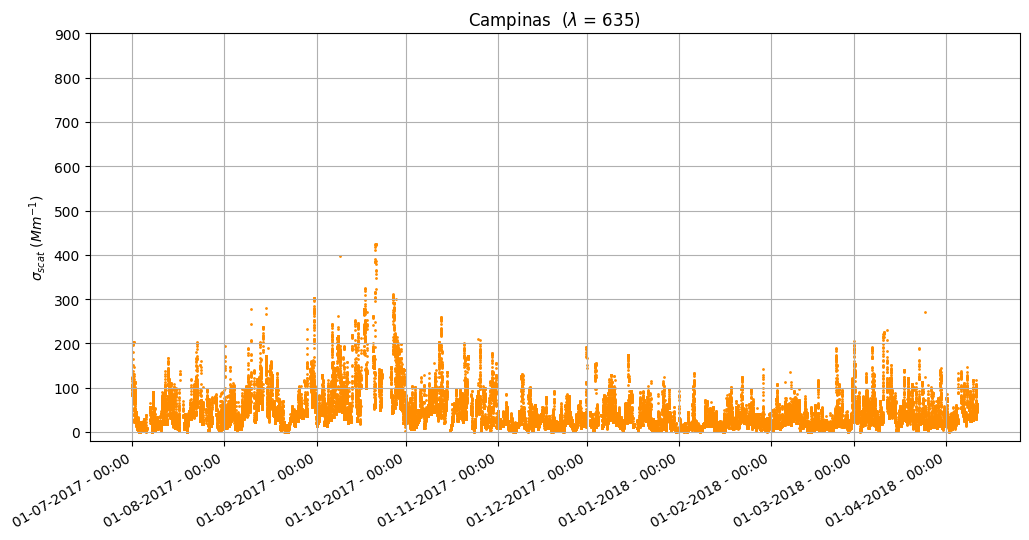

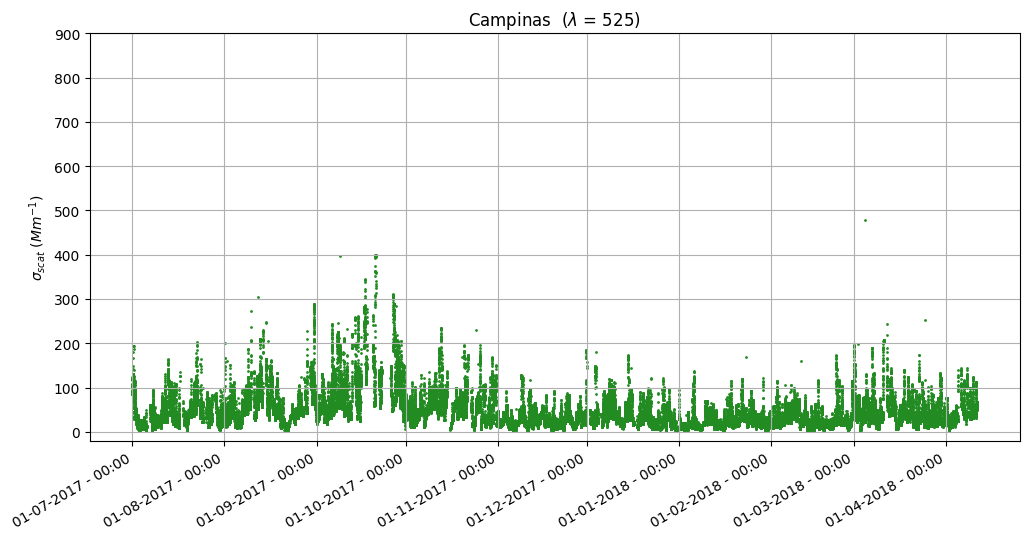

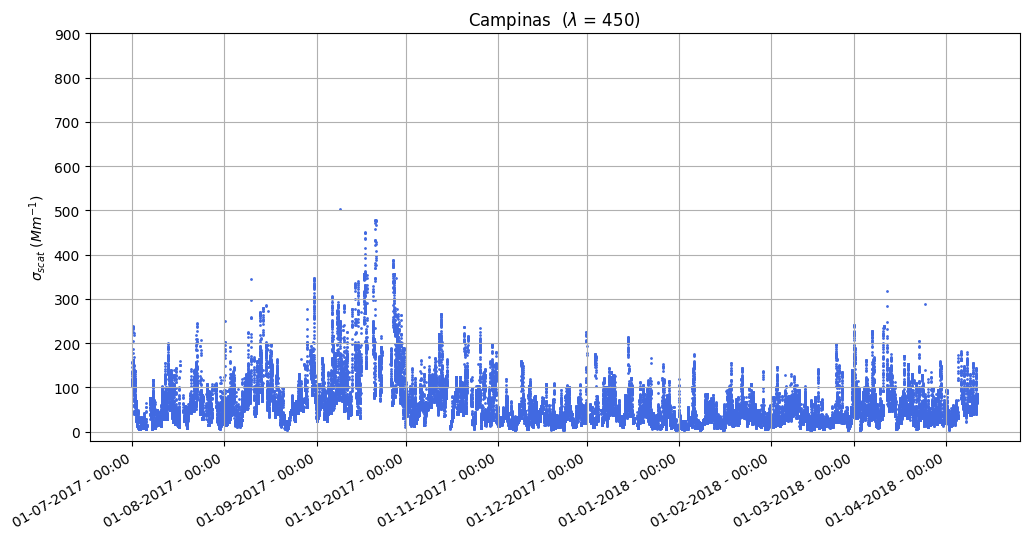

In [5]:
plots = [orange,green,blue]
cores = ['darkorange','forestgreen','royalblue']
labels=['635','525','450']

for i in range(len(plots)):
    plt.figure(figsize=(12, 6))
    plt.scatter(nefe.index, plots[i], color=cores[i],s=1)
    #plt.plot(nefe.index, green, color='forestgreen', label='Total scatt Green')
    #plt.plot(nefe.index, blue, color='royalblue', label='Total scatt Blue')
    plt.ylabel('$\sigma_{scat}~(Mm^{-1})$')
    plt.yticks(np.arange(0, 1000, 100))

    plt.title('Campinas  ($\lambda$ = %s)'%(labels[i]))

    # Formatando o eixo X para mostrar a nefe e hora
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y - %H:%M'))
    plt.gcf().autofmt_xdate()  # Rotaciona os rótulos do eixo X para melhor legibilidade

    #plt.legend()  # Mostra a legenda
    plt.grid()  # A

Percebi que esse csv já tinha o SAE mas o código que já estva feito então calculei novamente, e parece que obtive resultados compatíveis

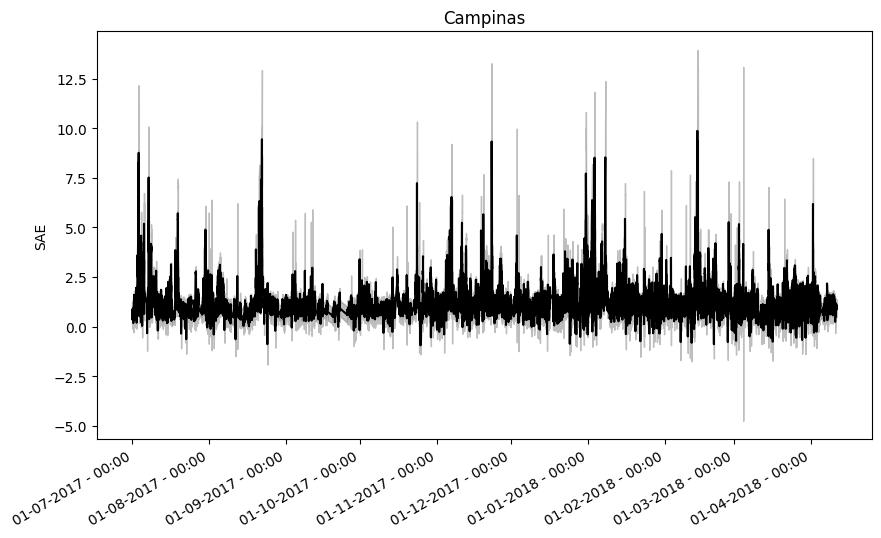

In [6]:
nefe[' scat637 Mean (Mm-1)'] = np.nan
nefe['SAE'] = np.nan
nefe['sigma_SAE'] = np.nan

lambdas = [635,525,450]
for i in range(len(nefe)):
    sigma = [orange[i],green[i],blue[i]]
    coeff, cov_matrix = np.polyfit(np.log(lambdas),np.log(sigma), 1,cov= True)
    nefe.at[nefe.index[i], 'SAE'] = -coeff[0]
    sigmaSAE = np.sqrt(cov_matrix[0, 0])
    scat637i = np.exp(coeff[0]*np.log(637) + coeff[1])
    nefe.at[nefe.index[i], ' scat637 Mean (Mm-1)'] = scat637i
    nefe.at[nefe.index[i], 'sigma_SAE'] = sigmaSAE


plt.figure(figsize=(10,6))
plt.plot(nefe.index, nefe['SAE'], color='black')

# Adiciona a sombra das incertezas usando fill_between
plt.fill_between(
    nefe.index,
    nefe['SAE'] - nefe['sigma_SAE'],  # Limite inferior da sombra
    nefe['SAE'] + nefe['sigma_SAE'],  # Limite superior da sombra
    color='gray',
    alpha=0.5,  # Transparência da sombra
    label='Incerteza'
)
plt.ylabel('SAE')
plt.title('Campinas')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y - %H:%M'))  # Exemplo: mostrar apenas horas e minutos
plt.gcf().autofmt_xdate() # Rotaciona os rótulos do eixo X para melhor legibilidade

#plt.legend()
#plt.grid()
plt.show()

### MAAP

In [7]:
maap = pd.read_csv('data/Campinas-2017_MAAP_5012_Level3_5min.csv', encoding='latin-1',header=1,sep=';')
maap = maap.dropna(subset=[' Abs637 Mean (Mm-1)'])#remove linhas com valores nulos na coluna

time= pd.to_datetime(maap[' UnixTime(UTC)'],unit='s')
maap = maap.drop('Time(UTC)', axis=1)
maap['Time(UTC)'] = time
maap.set_index('Time(UTC)', inplace=True)


for column in maap.columns:
   maap['%s'%(column)] = maap['%s'%(column)].astype(float)

maap = maap.dropna(subset=[' Abs637 Mean (Mm-1)'])#remove linhas com valores nulos na coluna
maap = maap.drop(' ',axis=1)
maap.index = maap.index - timedelta(hours=3)
maap

,UnixTime(UTC),BC637 Mean (ug.m-3),Abs637 Mean (Mm-1)
Time(UTC),,,
2017-07-01 21:05:00,1.498954e+09,0.995,6.567
2017-07-01 21:10:00,1.498954e+09,0.590,3.894
2017-07-01 21:15:00,1.498954e+09,0.874,5.768
2017-07-01 21:20:00,1.498955e+09,0.754,4.976
2017-07-01 21:25:00,1.498955e+09,0.808,5.333
...,...,...,...
2018-05-31 20:40:00,1.527810e+09,3.458,22.823
2018-05-31 20:45:00,1.527810e+09,2.350,15.510
2018-05-31 20:50:00,1.527811e+09,3.199,21.113


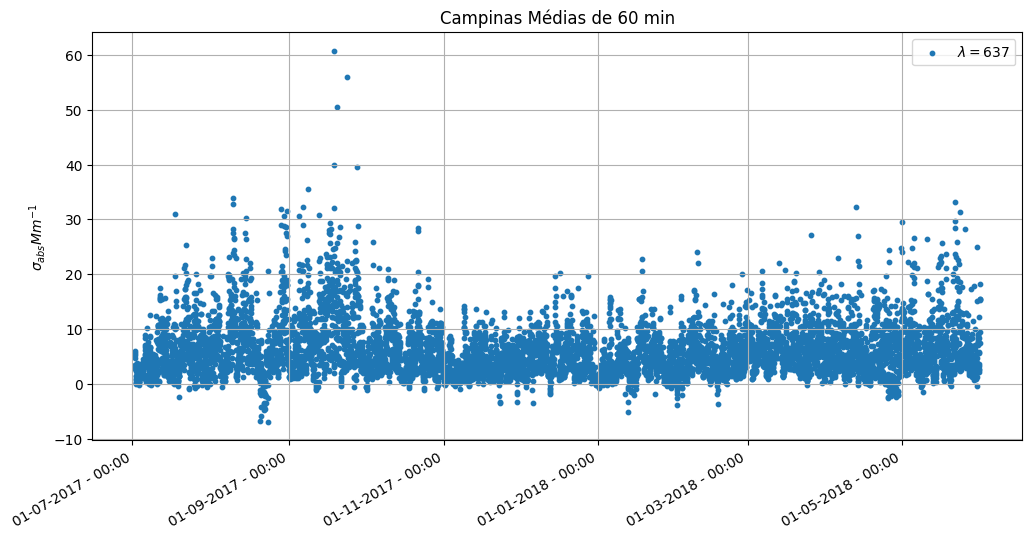

In [8]:
maap_1h = maap.resample('60min').mean()
plt.figure(figsize=(12, 6))
plt.scatter(maap_1h.index,maap_1h[' Abs637 Mean (Mm-1)'] ,s=10,label='$\lambda = 637$')

plt.ylabel('$\sigma_{abs} Mm^{-1}$')
plt.title('Campinas Médias de 60 min')

# Formatando o eixo X para mostrar a nefe e hora
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y - %H:%M'))
plt.gcf().autofmt_xdate()  # Rotaciona os rótulos do eixo X para melhor legibilidade

#plt.legend()  # Mostra a legenda
plt.grid()  # Adiciona a grade ao gráfico
plt.legend()
plt.show()

### Albedo

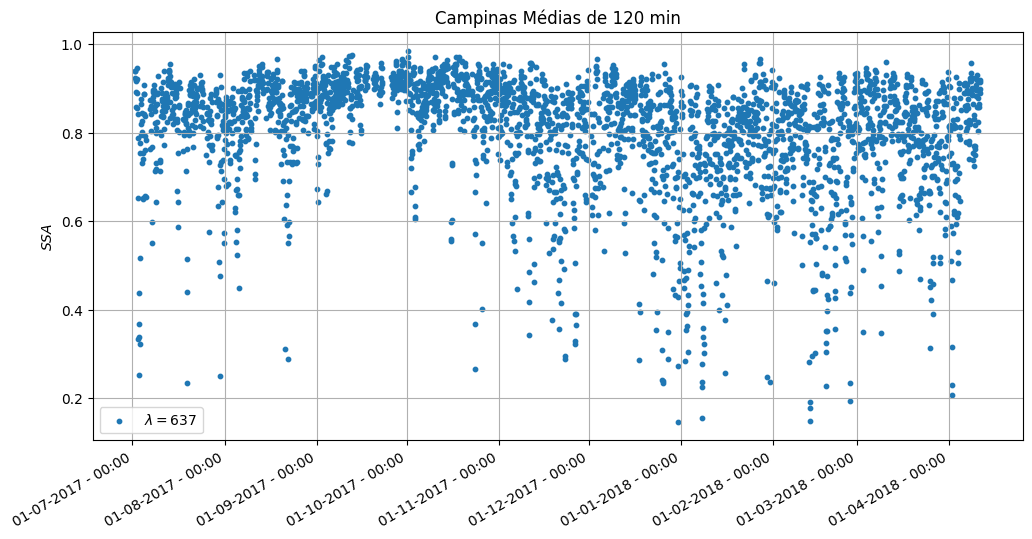

In [9]:
indices_comuns_albedo = nefe.index.intersection(maap.index)

# Filtrando os data sets para manter apenas os índices comuns
nefe_albedo_filtrado = nefe.loc[indices_comuns_albedo]
maap_filtrado = maap.loc[indices_comuns_albedo]

nefe_albedo_filtrado = nefe_albedo_filtrado.resample('120min').mean()
maap_filtrado = maap_filtrado.resample('120min').mean()

scat637_filtrado = nefe_albedo_filtrado[' scat637 Mean (Mm-1)']
abs637_filtrado =  maap_filtrado[' Abs637 Mean (Mm-1)']

albedo = scat637_filtrado/(scat637_filtrado + abs637_filtrado)
plt.figure(figsize=(12, 6))
plt.scatter(albedo.index,albedo ,s=10,label='$\lambda = 637$')

plt.ylabel('$SSA$')
plt.title('Campinas Médias de 120 min')

# Formatando o eixo X para mostrar a nefe e hora
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y - %H:%M'))
plt.gcf().autofmt_xdate()  # Rotaciona os rótulos do eixo X para melhor legibilidade

#plt.legend()  # Mostra a legenda
plt.grid()  # Adiciona a grade ao gráfico
plt.legend()
plt.show()



### Aetalômetro

- Com certeza é bom calcular o AAE
- Coluna "BB Mean" o que significa?
- o Albedo deve ser calculado com os dois conjuntos de dados?

In [10]:
aet = pd.read_csv('data/Campinas_Aethalometer_AE33_Level2_5min.csv', encoding='latin-1',header=1,sep=';')
aet = aet[aet[' BC470 Mean (ug.m-3)']!= ' NaN']#remove linhas com valores nulos na coluna  

time= pd.to_datetime(aet[' UnixTime(UTC)'],unit='s')
aet = aet.drop('Time(UTC)', axis=1)
aet['Time(UTC)'] = time
# Definindo a coluna de nefe e hora como índice
aet.set_index('Time(UTC)', inplace=True)

for column in aet.columns:
    aet['%s'%(column)] = aet['%s'%(column)].astype(float)

aet

,UnixTime(UTC),BC370 Mean (ug.m-3),BC470 Mean (ug.m-3),BC520 Mean (ug.m-3),BC590 Mean (ug.m-3),BC660 Mean (ug.m-3),BC880 Mean (ug.m-3),BC950 Mean (ug.m-3),BB Mean (percent),abs370 Mean (Mm-1),abs470 Mean (Mm-1),abs520 Mean (Mm-1),abs590 Mean (Mm-1),abs660 Mean (Mm-1),abs880 Mean (Mm-1),abs950 Mean (Mm-1),abs637 Mean (Mm-1),AAE Mean (adim),
Time(UTC),,,,,,,,,,,,,,,,,,,
2017-07-30 00:00:00,1.501373e+09,2.597,1.684,1.455,1.300,1.248,1.072,0.996,45.97,17.723,7.780,5.535,3.799,2.820,1.131,0.841,2.980,3.168,NaN
2017-07-30 00:25:00,1.501374e+09,2.099,1.539,1.410,1.355,1.290,1.088,1.198,37.18,11.127,5.733,4.552,3.684,3.026,1.773,1.786,3.180,1.917,NaN
2017-07-30 00:30:00,1.501375e+09,1.936,1.445,1.322,1.262,1.181,1.038,1.075,34.30,11.283,5.776,4.497,3.509,2.740,1.496,1.365,2.962,2.211,NaN
2017-07-30 00:35:00,1.501375e+09,1.846,1.414,1.272,1.217,1.139,0.994,1.028,32.70,10.233,5.464,4.220,3.347,2.655,1.512,1.398,2.853,2.087,NaN
2017-07-30 00:40:00,1.501375e+09,1.838,1.407,1.273,1.204,1.122,0.991,1.024,32.56,10.402,5.526,4.276,3.329,2.609,1.460,1.337,2.822,2.156,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-04 14:10:00,1.522851e+09,0.603,0.642,0.634,0.618,0.629,0.589,0.625,9.96,3.438,2.516,2.121,1.705,1.464,0.887,0.842,1.515,1.547,NaN
2018-04-04 14:15:00,1.522851e+09,0.853,0.882,0.849,0.844,0.838,0.799,0.828,14.09,5.873,3.932,3.120,2.421,1.915,0.978,0.854,2.061,2.097,NaN
2018-04-04 14:20:00,1.522852e+09,0.861,0.899,0.865,0.860,0.859,0.811,0.830,14.21,4.755,3.451,2.854,2.359,2.005,1.256,1.158,2.098,1.530,NaN


In [11]:
aet['AAE'] = np.nan
aet['sigma_AAE'] = np.nan

lambdas = [370,470,520,590,660,880,950]
for i in range(len(aet)):
    sigma = [aet[' abs370 Mean (Mm-1)'][i],aet[' abs470 Mean (Mm-1)'][i],aet[' abs520 Mean (Mm-1)'][i],aet[' abs590 Mean (Mm-1)'][i]
             ,aet[' abs660 Mean (Mm-1)'][i],aet[' abs880 Mean (Mm-1)'][i],aet[ ' abs950 Mean (Mm-1)'][i]]
    coeff, cov_matrix = np.polyfit(np.log(lambdas),np.log(sigma), 1,cov= True)
    aet.at[aet.index[i], 'AAE'] = -coeff[0]
    sigmaSAE = np.sqrt(cov_matrix[0, 0])
    #scat637i = np.exp(coeff[0]*np.log(637) + coeff[1])
    #aet.at[aet.index[i], ' scat637 Mean (Mm-1)'] = scat637i
    aet.at[aet.index[i], 'sigma_AAE'] = sigmaSAE


/tmp/ipykernel_5653/2529851896.py:8: RuntimeWarning: divide by zero encountered in log
  coeff, cov_matrix = np.polyfit(np.log(lambdas),np.log(sigma), 1,cov= True)
/tmp/ipykernel_5653/2529851896.py:8: RuntimeWarning: invalid value encountered in log
  coeff, cov_matrix = np.polyfit(np.log(lambdas),np.log(sigma), 1,cov= True)


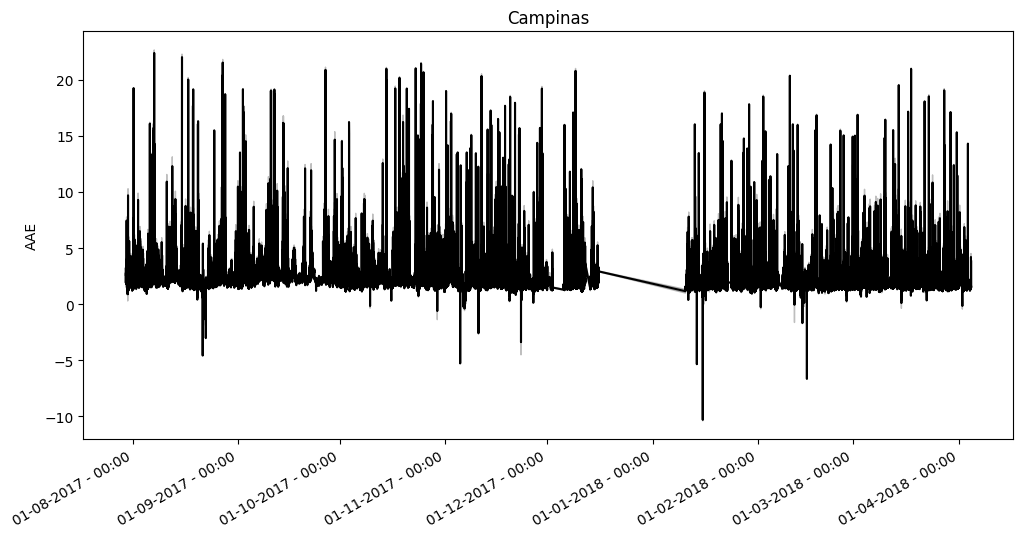

In [12]:

plt.figure(figsize=(12,6))
plt.plot(aet.index, aet['AAE'], color='black')

# Adiciona a sombra das incertezas usando fill_between
plt.fill_between(
    aet.index,
    aet['AAE'] - aet['sigma_AAE'],  # Limite inferior da sombra
    aet['AAE'] + aet['sigma_AAE'],  # Limite superior da sombra
    color='gray',
    alpha=0.5,  # Transparência da sombra
    label='Incerteza'
)
plt.ylabel('AAE')
plt.title('Campinas')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y - %H:%M'))  # Exemplo: mostrar apenas horas e minutos
plt.gcf().autofmt_xdate() # Rotaciona os rótulos do eixo X para melhor legibilidade

#plt.legend()
#plt.grid()
plt.show()

### CDMs

In [13]:
nefe_albedo_media_1h = nefe.resample('60min').mean()

nefe_albedo_media_1h['hour'] = nefe_albedo_media_1h.index.hour
# Agrupando por hora e calculando a média
nefe_albedo_cdm = nefe_albedo_media_1h.groupby('hour').mean()

maap_media_1h = maap.resample('60min').mean()

maap_media_1h['hour'] = maap_media_1h.index.hour
# Agrupando por hora e calculando a média
maap_cdm = maap_media_1h.groupby('hour').mean()

In [14]:
aet_media_1h = aet.resample('60min').mean()

aet_media_1h['hour'] = aet_media_1h.index.hour
# Agrupando por hora e calculando a média
aet_cdm = aet_media_1h.groupby('hour').mean()

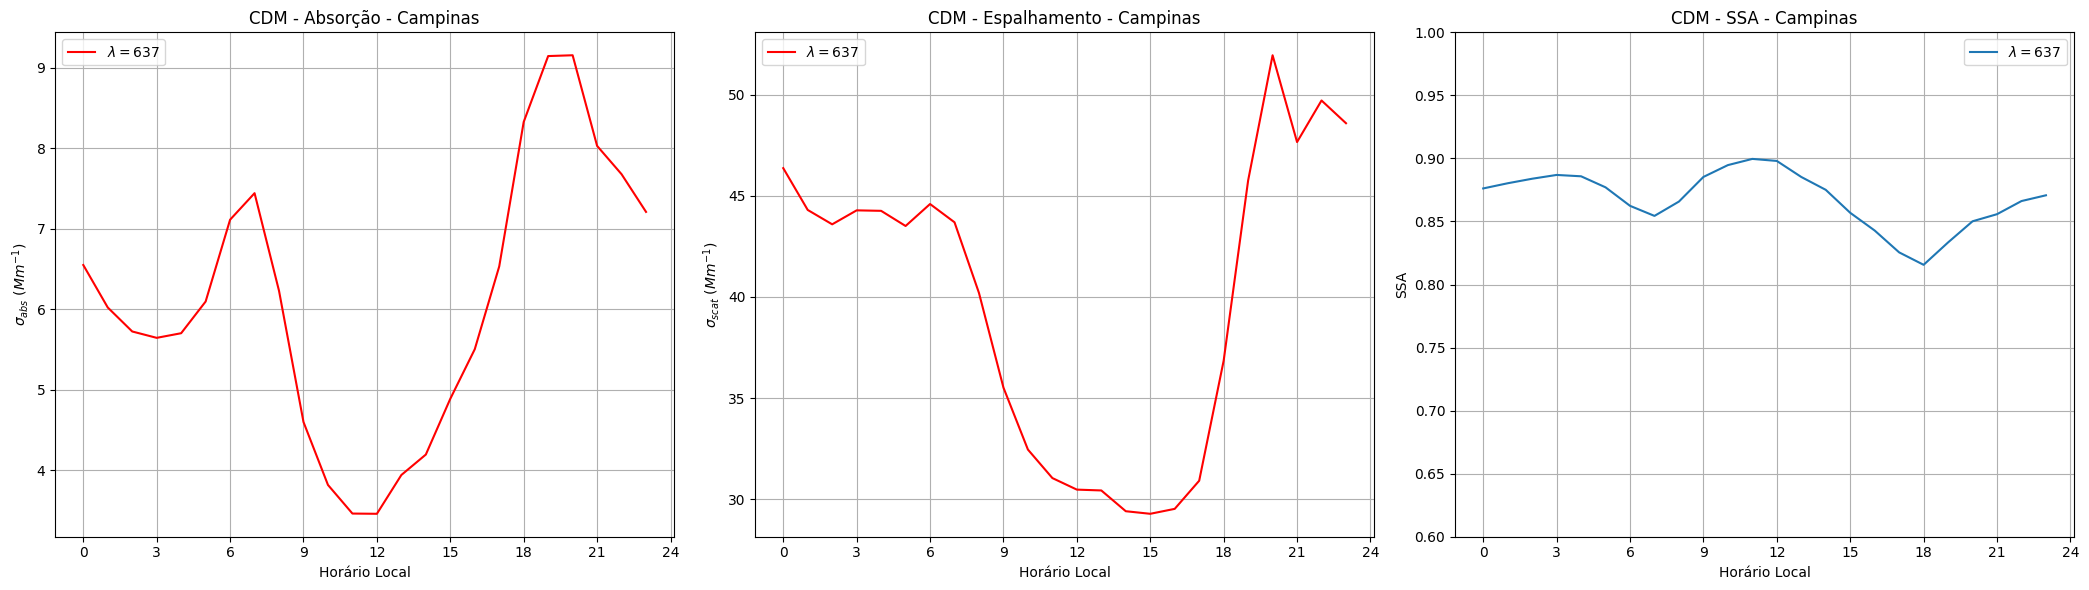

In [15]:

scat637_cdm = nefe_albedo_cdm[[' scat637 Mean (Mm-1)']]
scat637_cdm = scat637_cdm.squeeze()
abs637_cdm = maap_cdm[' Abs637 Mean (Mm-1)']
albedo_cdm = scat637_cdm/(scat637_cdm + abs637_cdm)

dados = [
    (maap_cdm.index, maap_cdm[' Abs637 Mean (Mm-1)'], '$\sigma_{abs}~(Mm^{-1})$', 'CDM - Absorção - Campinas', '$\sigma_{abs}~(Mm^{-1})$', None),
    (nefe_albedo_cdm.index, scat637_cdm, '$\sigma_{scat}~(Mm^{-1})$', 'CDM - Espalhamento - Campinas', '$\sigma_{scat}~(Mm^{-1})$', None),
    (maap_cdm.index, albedo_cdm, 'SSA', 'CDM - SSA - Campinas', 'SSA', (0.6, 1))
]   

# Criar subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Loop para plotar os gráficos
for ax, (x, y, ylabel, title, label, ylim) in zip(axes, dados):
    ax.plot(x, y, label='$\lambda = 637$', color='red' if 'Absorção' in title or 'Espalhamento' in title else None)
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Horário Local')
    ax.set_xticks(np.arange(0, 24.001, 3))
    #ax.set_ylim(0,80)
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title(title)
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()


### Relatório Campinas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


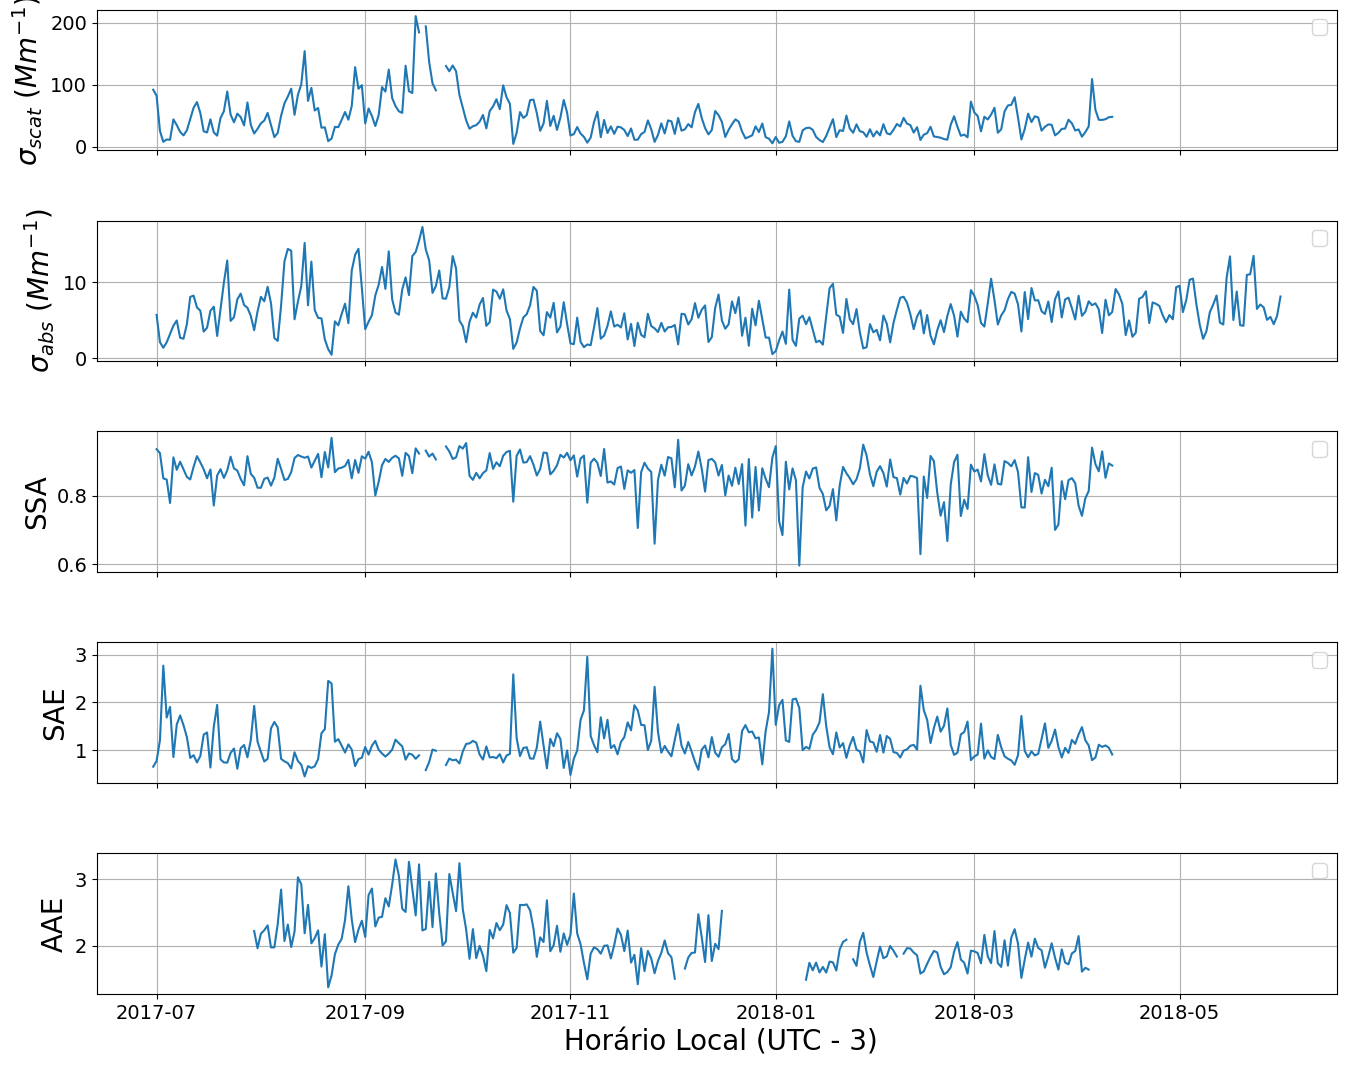

In [16]:
nefe_media_dia = nefe.resample('1440min').mean()
maap_media_dia = maap.resample('1440min').mean()
aet_media_dia = aet.resample('1440min').mean()

albedo_media_dia = (nefe_media_dia[' scat637 Mean (Mm-1)'])/(nefe_media_dia[' scat637 Mean (Mm-1)']+maap_media_dia[' Abs637 Mean (Mm-1)'])

fig, axes = plt.subplots(5, 1, figsize=(16, 12),sharex=True)
dados = [
    
    (nefe_media_dia.index, nefe_media_dia[' scat637 Mean (Mm-1)'], 
     '$\sigma_{scat}~(Mm^{-1})$', 'Espalhamento'),

    (maap_media_dia.index, maap_media_dia[' Abs637 Mean (Mm-1)'], 
     '$\sigma_{abs}~(Mm^{-1})$', 'Absorção'),

     (albedo_media_dia.index, albedo_media_dia, 
     'SSA', 'albedo'), 

    (nefe_media_dia.index, nefe_media_dia['SAE'], 
     'SAE', 'SAE'),

    (aet_media_dia.index, aet_media_dia['AAE'], 
     'AAE', 'AAE'), 
]

# Loop para plotar os gráficos com períodos diferenciados por cor
for ax, (x, y, ylabel, title) in zip(axes.ravel(), dados):
    ax.plot(x,y)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.tick_params(axis='both', labelsize=14)
    ax.grid()

    ax.legend(fontsize=14)

# Adicionando a legenda para todos os subplots
axes[-1].set_xlabel(' Horário Local (UTC - 3)', fontsize=20)
axes[-1].tick_params(axis='x', labelsize=14)
plt.subplots_adjust(hspace=0.5, top=0.93)

plt.show()

In [17]:
print('Scaterring:')
print('Média:',nefe_media_dia[' scat637 Mean (Mm-1)'].mean(),'+-',nefe_media_dia[' scat637 Mean (Mm-1)'].std())
print('Máximo:',nefe_media_dia[' scat637 Mean (Mm-1)'].max())
print('Mínimo',nefe_media_dia[' scat637 Mean (Mm-1)'].min())

print()
print('Absortion:')
print('Média:', maap_media_dia[' Abs637 Mean (Mm-1)'].mean(),'+-', maap_media_dia[' Abs637 Mean (Mm-1)'].std())
print('Máximo:', maap_media_dia[' Abs637 Mean (Mm-1)'].max())
print('Mínimo', maap_media_dia[' Abs637 Mean (Mm-1)'].min())
print()

print('SSA:')
print('Média:', albedo_media_dia.mean(),'+-', albedo_media_dia.std())
print('Máximo:',albedo_media_dia.max())
print('Mínimo', albedo_media_dia.min())
print()
print('SAE:')
print('Média:',nefe_media_dia['SAE'].mean(),'+-',nefe_media_dia['SAE'].std())
print('Máximo:',nefe_media_dia['SAE'].max())
print('Mínimo',nefe_media_dia['SAE'].min())


print()
print('AEE:')
print('Média:', aet_media_dia['AAE'].mean(),'+-', aet_media_dia['AAE'].std())
print('Máximo:',aet_media_dia['AAE'].max())
print('Mínimo', aet_media_dia['AAE'].min())

Scaterring:
Média: 43.621993824396576 +- 31.67690737381949
Máximo: 210.38215575467905
Mínimo 4.2925400891737775

Absortion:
Média: 6.079648446684323 +- 3.0152576748799382
Máximo: 17.288884615384617
Mínimo 0.42106481481481484

SSA:
Média: 0.8631238359630827 +- 0.05770650605212616
Máximo: 0.9683456486634097
Mínimo 0.5958585319940626

SAE:
Média: 1.1478543289538137 +- 0.4148335334364357
Máximo: 3.125183456371569
Mínimo 0.4403505891346315

AEE:
Média: 2.0711517583704717 +- 0.3920074571541806
Máximo: 3.2973435913105362
Mínimo 1.3720922167908227


In [18]:
dados = [
    
    (nefe_media_dia.index, nefe_media_dia[' scat637 Mean (Mm-1)'], 
     '$\sigma_{scat}~(Mm^{-1})$', 'Espalhamento'),

    (maap_media_dia.index, maap_media_dia[' Abs637 Mean (Mm-1)'], 
     '$\sigma_{abs}~(Mm^{-1})$', 'Absorção'),

     (albedo_media_dia.index, albedo_media_dia, 
     'SSA', 'albedo'), 

    (nefe_media_dia.index, nefe_media_dia['SAE'], 
     'SAE', 'SAE'),

    (aet_media_dia.index, aet_media_dia['AAE'], 
     'AAE', 'AAE'), 
]

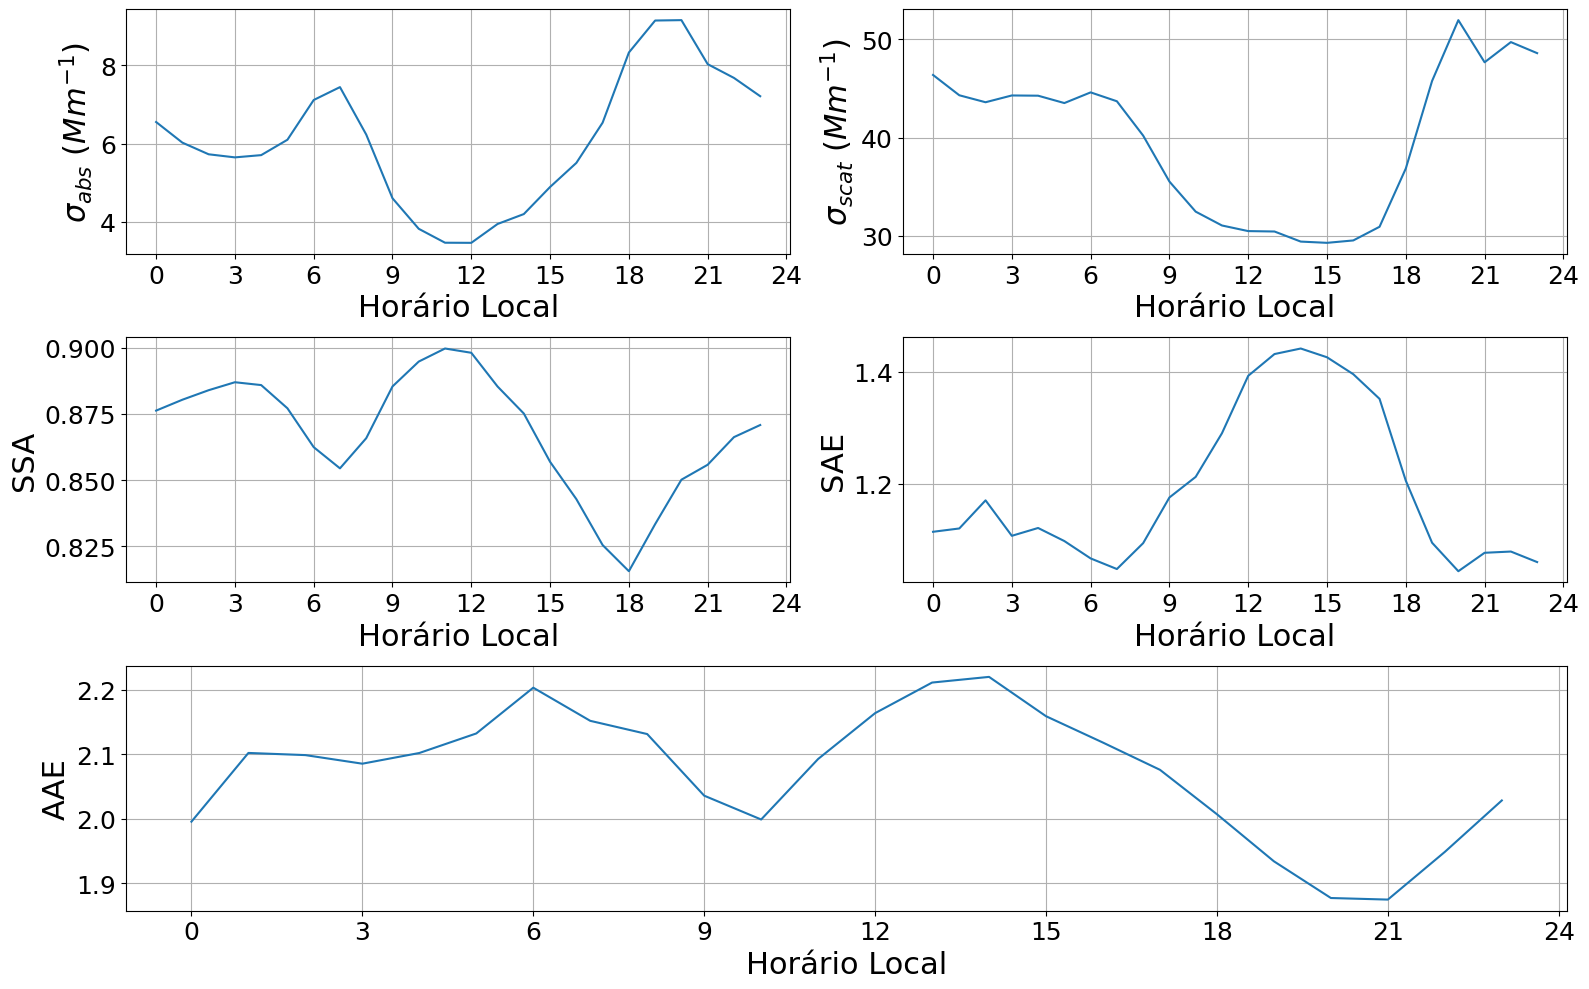

In [19]:
dados = [
    (maap_cdm.index, maap_cdm[' Abs637 Mean (Mm-1)'], '$\sigma_{abs}~(Mm^{-1})$', 'CDM - Absorção - Campinas'),
    (nefe_albedo_cdm.index, scat637_cdm, '$\sigma_{scat}~(Mm^{-1})$','a'),
    (maap_cdm.index, albedo_cdm, 'SSA', 'CDM - SSA - Campinas'),
    (nefe_albedo_cdm.index, nefe_albedo_cdm['SAE'], 'SAE', 'SAE'),
    (aet_cdm.index, aet_cdm['AAE'], 'AAE', 'AAE'),
]  
# Cria figura e grade 3x2
fig, axes = plt.subplots(3, 2, figsize=(16, 10))

# "Achata" o array de eixos para indexar facilmente
flat_axes = axes.flat

# Loop para plotar os 4 primeiros conjuntos de dados nos 4 primeiros eixos
for i in range(4):
    ax = next(flat_axes)  # Pega o próximo eixo
    x, y, ylabel, title = dados[i]
    ax.plot(x, y, label='Total')
    
    ax.set_ylabel(ylabel, fontsize=22)
    ax.set_xlabel('Horário Local', fontsize=22)
    ax.set_xticks(np.arange(0, 24.001, 3))
    ax.tick_params(axis='both', labelsize=18)
    #ax.legend(fontsize=16)
    ax.grid(True)
    #ax.set_title(title, fontsize=20)

# Remove os dois eixos da última linha (para liberar espaço)
axes[2,0].remove()
axes[2,1].remove()

# Cria um novo eixo que ocupe as duas colunas da 3ª linha
ax5 = fig.add_subplot(3, 1, 3)  # Índice 3 significa "terceira linha" em um layout de 3 linhas e 1 coluna

# Pega o 5º conjunto de dados e plota nesse novo eixo
x, y, ylabel, title = dados[4]
ax5.plot(x, y, label='Total')

ax5.set_ylabel(ylabel, fontsize=22)
ax5.set_xlabel('Horário Local', fontsize=22)
ax5.set_xticks(np.arange(0, 24.001, 3))
ax5.tick_params(axis='both', labelsize=18)
#ax5.legend(fontsize=16)
ax5.grid(True)
#ax5.set_title(title, fontsize=20)

# Ajusta o espaçamento
plt.tight_layout()
plt.show()

### Analisando por estações do ano

In [20]:
from datetime import datetime
estacoes= [['primavera',"2017-09-22 00:00:00","2017-12-20 00:00:00"] ]

start_primavera= "2017-09-01 00:00:00"
start_primavera = datetime.strptime(start_primavera, "%Y-%m-%d %H:%M:%S")

end_primavera= "2017-11-30 23:59:59"
end_primavera = datetime.strptime(end_primavera , "%Y-%m-%d %H:%M:%S")


start_verao = "2017-12-01 00:00:00"
start_verao = datetime.strptime(start_verao, "%Y-%m-%d %H:%M:%S")

end_verao = "2018-02-28 23:59:59"
end_verao = datetime.strptime(end_verao, "%Y-%m-%d %H:%M:%S")


start_outono = "2018-03-01 00:00:00"
start_outono = datetime.strptime(start_outono, "%Y-%m-%d %H:%M:%S")

end_outono= "2018-05-30 23:59:59"
end_outono = datetime.strptime(end_outono, "%Y-%m-%d %H:%M:%S")


start_inverno = "2017-06-25 00:00:00"
start_inverno = datetime.strptime(start_inverno, "%Y-%m-%d %H:%M:%S")

end_inverno = "2017-08-31 23:59:59"
end_inverno = datetime.strptime(end_inverno, "%Y-%m-%d %H:%M:%S")


In [21]:
aet.columns

Index([' UnixTime(UTC)', ' BC370 Mean (ug.m-3)', ' BC470 Mean (ug.m-3)',
       ' BC520 Mean (ug.m-3)', ' BC590 Mean (ug.m-3)', ' BC660 Mean (ug.m-3)',
       ' BC880 Mean (ug.m-3)', ' BC950 Mean (ug.m-3)', ' BB Mean (percent)',
       ' abs370 Mean (Mm-1)', ' abs470 Mean (Mm-1)', ' abs520 Mean (Mm-1)',
       ' abs590 Mean (Mm-1)', ' abs660 Mean (Mm-1)', ' abs880 Mean (Mm-1)',
       ' abs950 Mean (Mm-1)', ' abs637 Mean (Mm-1)', ' AAE Mean (adim)', ' ',
       'AAE', 'sigma_AAE'],
      dtype='object')

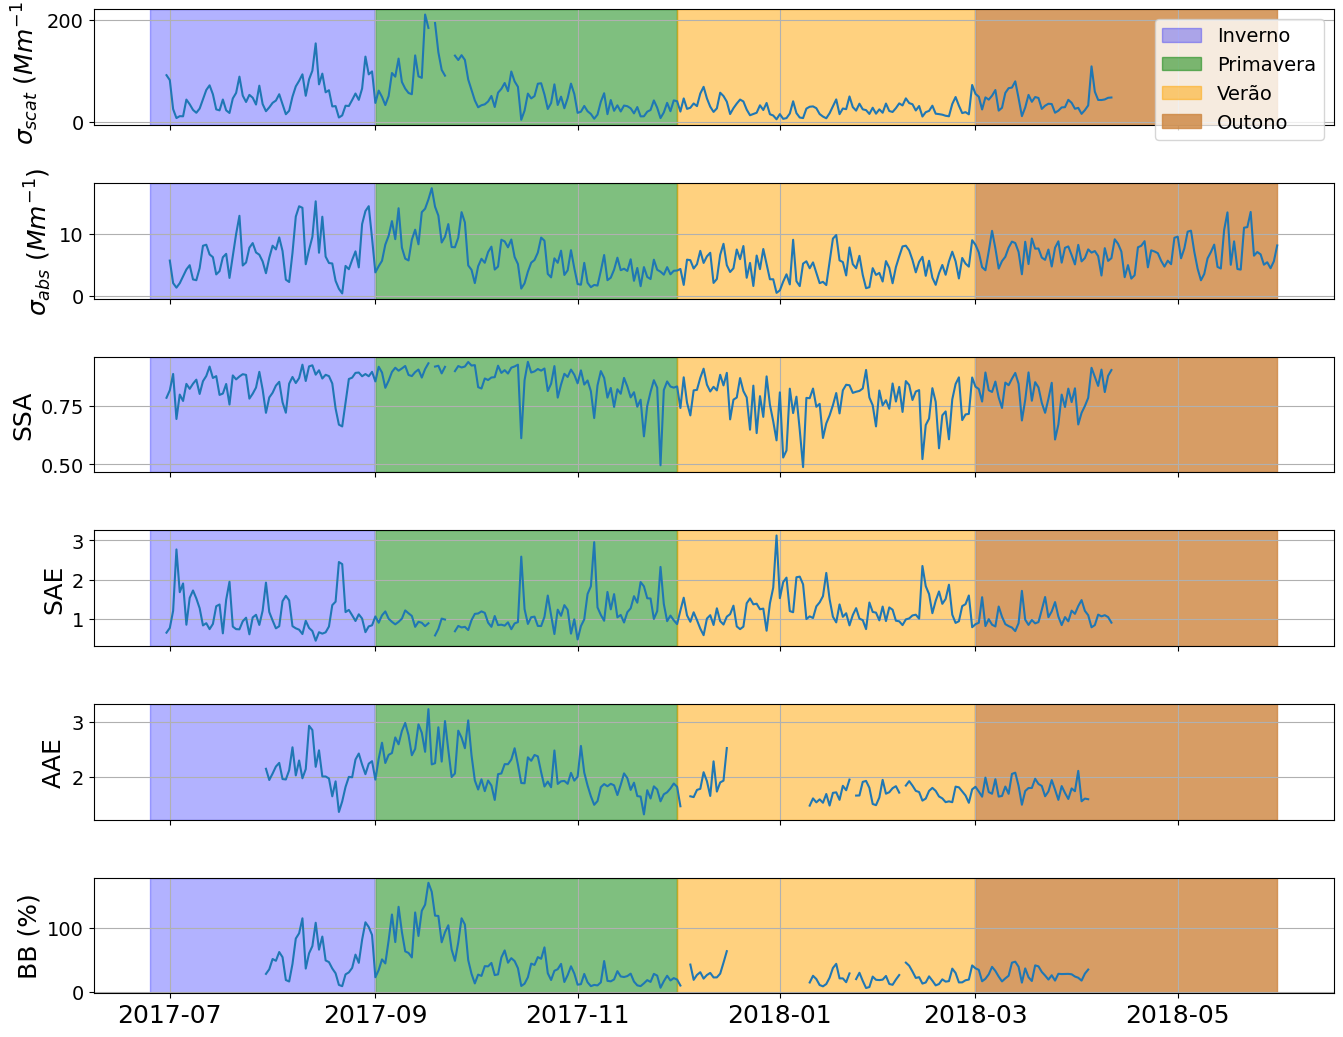

In [22]:
nefe_media_dia = nefe.resample('1440min').mean()
maap_media_dia = maap.resample('1440min').mean()
aet_media_dia = aet.resample('1440min').mean()

albedo_media_dia = (nefe_media_dia[' scat637 Mean (Mm-1)'])/(nefe_media_dia[' scat637 Mean (Mm-1)']+maap_media_dia[' Abs637 Mean (Mm-1)'])

fig, axes = plt.subplots(6, 1, figsize=(16, 12),sharex=True)
dados = [
    
    (nefe_media_dia.index, nefe_media_dia[' scat637 Mean (Mm-1)'], 
     '$\sigma_{scat}~(Mm^{-1})$', 'Espalhamento'),

    (maap_media_dia.index, maap_media_dia[' Abs637 Mean (Mm-1)'], 
     '$\sigma_{abs}~(Mm^{-1})$', 'Absorção'),

     (nefe_media_dia.index, nefe_media_dia[' SSA637 Mean (adim)'], 
     'SSA', 'albedo'), 

    (nefe_media_dia.index, nefe_media_dia[' Angstrom_powerlawfit Mean (prct)'], 
     'SAE', 'SAE'),

    (aet_media_dia.index, aet_media_dia[' AAE Mean (adim)'], 
     'AAE', 'AAE'), 
    (aet_media_dia.index, aet_media_dia[' BB Mean (percent)'], 
     'BB (%)', 'BB'), 

]

# Loop para plotar os gráficos com períodos diferenciados por cor
for ax, (x, y, ylabel, title) in zip(axes.ravel(), dados):
    ax.plot(x,y)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.tick_params(axis='both', labelsize=14)
    ax.grid()
    ax.axvspan(pd.to_datetime(start_inverno), pd.to_datetime(end_inverno), color='blue', alpha=0.3, label='Inverno')
    ax.axvspan(pd.to_datetime(start_primavera), pd.to_datetime(end_primavera), color='green', alpha=0.5, label='Primavera')
    ax.axvspan(pd.to_datetime(start_verao), pd.to_datetime(end_verao), color='orange', alpha=0.5, label='Verão')
    ax.axvspan(pd.to_datetime(start_outono), pd.to_datetime(end_outono), color='peru', alpha=0.8, label='Outono')
    
    #ax.legend(fontsize=14)

# Adicionando a legenda para todos os subplots
axes[0].legend(fontsize=14)
#axes[-1].set_xlabel(' Horário Local (UTC - 3)', fontsize=20)
axes[-1].tick_params(axis='x', labelsize=18)
plt.subplots_adjust(hspace=0.5, top=0.93)

plt.show()

In [23]:
print('Scaterring:')
print('Média:',nefe_media_dia[' scat637 Mean (Mm-1)'].mean(),'+-',nefe_media_dia[' scat637 Mean (Mm-1)'].std())
print('Máximo:',nefe_media_dia[' scat637 Mean (Mm-1)'].max())
print('Mínimo',nefe_media_dia[' scat637 Mean (Mm-1)'].min())

print()
print('Absortion:')
print('Média:', maap_media_dia[' Abs637 Mean (Mm-1)'].mean(),'+-', maap_media_dia[' Abs637 Mean (Mm-1)'].std())
print('Máximo:', maap_media_dia[' Abs637 Mean (Mm-1)'].max())
print('Mínimo', maap_media_dia[' Abs637 Mean (Mm-1)'].min())
print()
print('SAE:')
print('Média:',nefe_media_dia['SAE'].mean(),'+-',nefe_media_dia['SAE'].std())
print('Máximo:',nefe_media_dia['SAE'].max())
print('Mínimo',nefe_media_dia['SAE'].min())


print()
print('SSA:')
print('Média:', albedo_media_dia.mean(),'+-', albedo_media_dia.std())
print('Máximo:',albedo_media_dia.max())
print('Mínimo', albedo_media_dia.min())

Scaterring:
Média: 43.621993824396576 +- 31.67690737381949
Máximo: 210.38215575467905
Mínimo 4.2925400891737775

Absortion:
Média: 6.079648446684323 +- 3.0152576748799382
Máximo: 17.288884615384617
Mínimo 0.42106481481481484

SAE:
Média: 1.1478543289538137 +- 0.4148335334364357
Máximo: 3.125183456371569
Mínimo 0.4403505891346315

SSA:
Média: 0.8631238359630827 +- 0.05770650605212616
Máximo: 0.9683456486634097
Mínimo 0.5958585319940626


#### Inverno

In [24]:
nefe_inverno = nefe.loc[start_inverno:end_inverno]
nefe_albedo_media_1h_inverno = nefe_inverno.resample('60min').mean()

nefe_albedo_media_1h_inverno['hour'] = nefe_albedo_media_1h_inverno.index.hour
# Agrupando por hora e calculando a média
nefe_albedo_cdm_inverno = nefe_albedo_media_1h_inverno.groupby('hour').mean()

maap_inverno = maap.loc[start_inverno:end_inverno]
maap_media_1h_inverno = maap_inverno.resample('60min').mean()

maap_media_1h_inverno['hour'] = maap_media_1h_inverno.index.hour
# Agrupando por hora e calculando a média
maap_cdm_inverno = maap_media_1h_inverno.groupby('hour').mean()


scat637_cdm_inverno = nefe_albedo_cdm_inverno[[' scat637 Mean (Mm-1)']]
scat637_cdm_inverno = scat637_cdm_inverno.squeeze()

abs637_cdm_inverno = maap_cdm_inverno[' Abs637 Mean (Mm-1)']

albedo_cdm_inverno = scat637_cdm_inverno/(scat637_cdm_inverno + abs637_cdm_inverno)


aet_inverno = aet.loc[start_inverno:end_inverno]
aet_media_1h_inverno = aet_inverno.resample('60min').mean()

aet_media_1h_inverno['hour'] = aet_media_1h_inverno.index.hour
# Agrupando por hora e calculando a média
aet_cdm_inverno = aet_media_1h_inverno.groupby('hour').mean()

#### Verão

In [25]:
nefe_verao = nefe.loc[start_verao:end_verao]
nefe_albedo_media_1h_verao = nefe_verao.resample('60min').mean()

nefe_albedo_media_1h_verao['hour'] = nefe_albedo_media_1h_verao.index.hour
# Agrupando por hora e calculando a média
nefe_albedo_cdm_verao = nefe_albedo_media_1h_verao.groupby('hour').mean()

maap_verao = maap.loc[start_verao:end_verao]
maap_media_1h_verao = maap_verao.resample('60min').mean()

maap_media_1h_verao['hour'] = maap_media_1h_verao.index.hour
# Agrupando por hora e calculando a média
maap_cdm_verao = maap_media_1h_verao.groupby('hour').mean()


scat637_cdm_verao = nefe_albedo_cdm_verao[[' scat637 Mean (Mm-1)']]
scat637_cdm_verao = scat637_cdm_verao.squeeze()

abs637_cdm_verao = maap_cdm_verao[' Abs637 Mean (Mm-1)']

albedo_cdm_verao = scat637_cdm_verao/(scat637_cdm_verao + abs637_cdm_verao)


aet_verao = aet.loc[start_verao:end_verao]
aet_media_1h_verao = aet_verao.resample('60min').mean()

aet_media_1h_verao['hour'] = aet_media_1h_verao.index.hour
# Agrupando por hora e calculando a média
aet_cdm_verao = aet_media_1h_verao.groupby('hour').mean()

In [26]:
aet.columns

Index([' UnixTime(UTC)', ' BC370 Mean (ug.m-3)', ' BC470 Mean (ug.m-3)',
       ' BC520 Mean (ug.m-3)', ' BC590 Mean (ug.m-3)', ' BC660 Mean (ug.m-3)',
       ' BC880 Mean (ug.m-3)', ' BC950 Mean (ug.m-3)', ' BB Mean (percent)',
       ' abs370 Mean (Mm-1)', ' abs470 Mean (Mm-1)', ' abs520 Mean (Mm-1)',
       ' abs590 Mean (Mm-1)', ' abs660 Mean (Mm-1)', ' abs880 Mean (Mm-1)',
       ' abs950 Mean (Mm-1)', ' abs637 Mean (Mm-1)', ' AAE Mean (adim)', ' ',
       'AAE', 'sigma_AAE'],
      dtype='object')

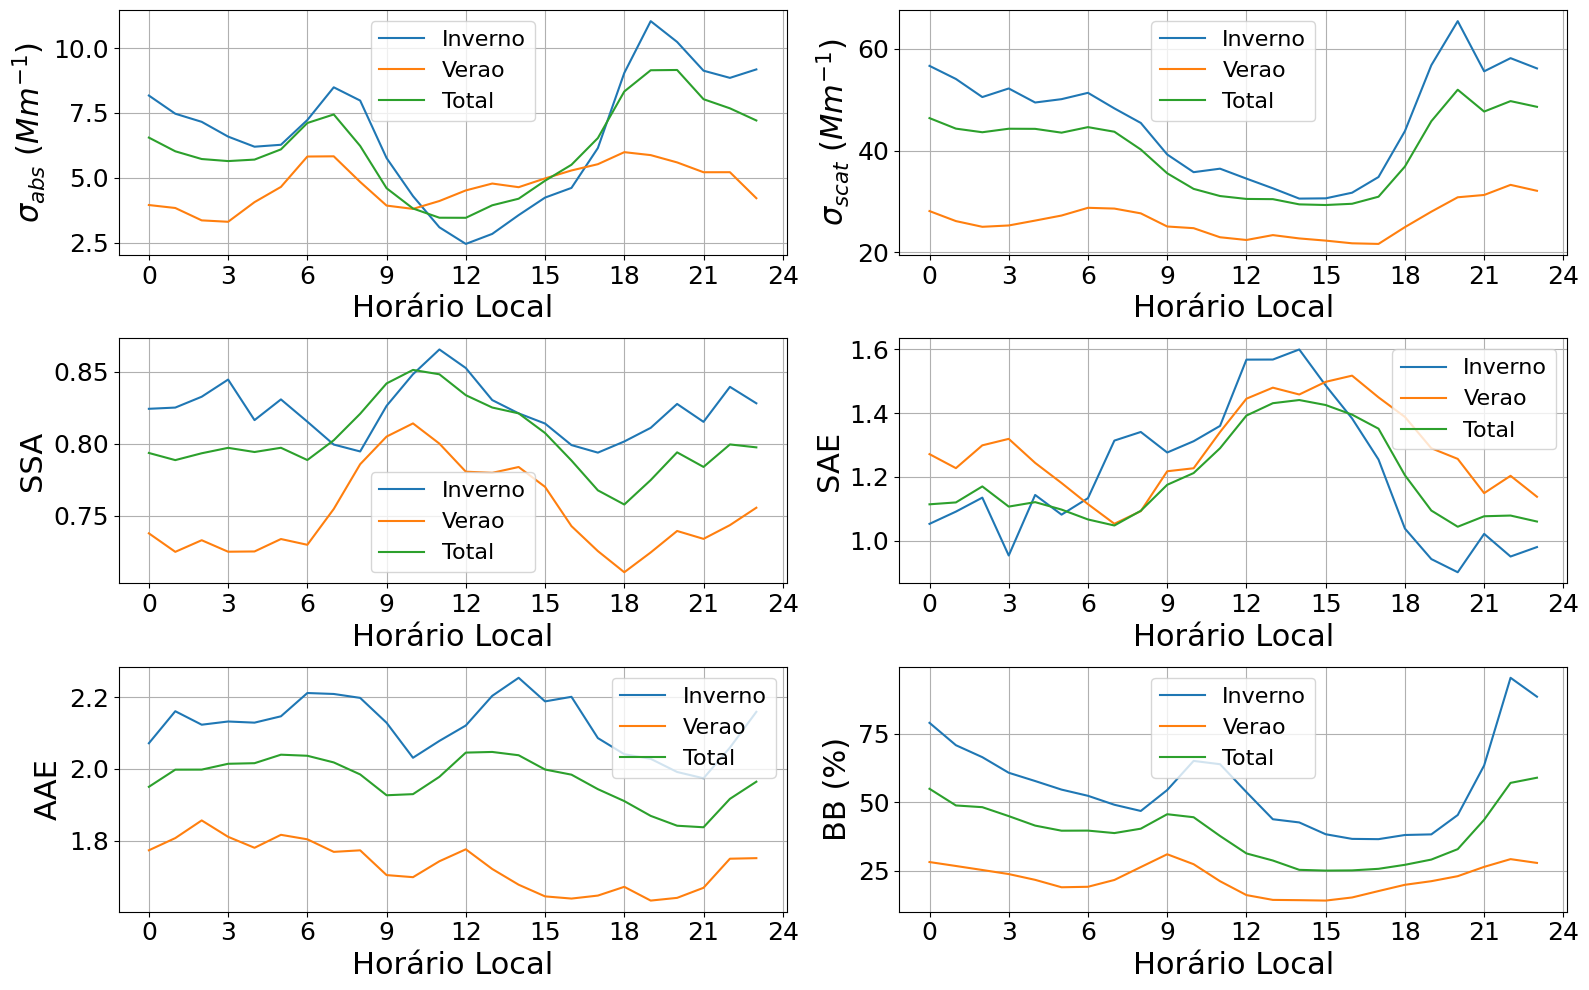

In [27]:
# Dados inverno e verao organizados para o loop
dados = [
    # Absorção
    (maap_cdm_inverno.index, maap_cdm_inverno[' Abs637 Mean (Mm-1)'], maap_cdm_verao[' Abs637 Mean (Mm-1)'], 
     maap_cdm[' Abs637 Mean (Mm-1)'],
     '$\sigma_{abs}~(Mm^{-1})$'),
    
    # Espalhamento
    (nefe_albedo_cdm_inverno.index, nefe_albedo_cdm_inverno[' scat637 Mean (Mm-1)'], nefe_albedo_cdm_verao[' scat637 Mean (Mm-1)'], nefe_albedo_cdm[' scat637 Mean (Mm-1)'],
     '$\sigma_{scat}~(Mm^{-1})$'),
    
    # Albedo (SSA)
    (nefe_albedo_cdm_inverno.index, nefe_albedo_cdm_inverno[' SSA637 Mean (adim)'], nefe_albedo_cdm_verao[' SSA637 Mean (adim)'], nefe_albedo_cdm[' SSA637 Mean (adim)'],
     'SSA'),
    # SAE
    (nefe_albedo_cdm_inverno.index, nefe_albedo_cdm_inverno[' Angstrom_powerlawfit Mean (prct)'], nefe_albedo_cdm_verao[' Angstrom_powerlawfit Mean (prct)'],
     nefe_albedo_cdm[' Angstrom_powerlawfit Mean (prct)'],  
     'SAE'),
    # AAE
    (aet_cdm_inverno.index, aet_cdm_inverno[' AAE Mean (adim)'], aet_cdm_verao[' AAE Mean (adim)'], aet_cdm[' AAE Mean (adim)'],
     'AAE'),  
     #BB
    (aet_cdm_inverno.index, aet_cdm_inverno[' BB Mean (percent)'], aet_cdm_verao[' BB Mean (percent)'], aet_cdm[' BB Mean (percent)'],
     'BB (%)'),  
]

fig, axes = plt.subplots(3, 2, figsize=(16, 10))

# "Achata" o array de eixos para indexar facilmente
flat_axes = axes.flat

# Loop para plotar os 4 primeiros conjuntos de dados nos 4 primeiros eixos
for i in range(6):
    ax = flat_axes[i] # Pega o próximo eixo
    x, y_inverno, y_verao, y_total,ylabel = dados[i]
    ax.plot(x, y_inverno, label='Inverno')
    ax.plot(x, y_verao, label='Verao')
    ax.plot(x, y_total, label='Total')
    ax.set_ylabel(ylabel, fontsize=22)
    ax.set_xlabel('Horário Local', fontsize=22)
    ax.set_xticks(np.arange(0, 24.001, 3))
    ax.tick_params(axis='both', labelsize=18)
    #ax.legend(fontsize=16)
    ax.legend(fontsize=16)
    ax.grid(True)
    #ax.set_title(title, fontsize=20)

# Remove os dois eixos da última linha (para liberar espaço


# Ajusta o espaçamento
plt.tight_layout()
plt.show()

#### Boxplot

In [28]:
tempo = 60
maap_verao_hora =  maap_verao.resample(f'{tempo}min').mean()
maap_inverno_hora =  maap_inverno.resample(f'{tempo}min').mean()

nefe_verao_hora =  nefe_verao.resample(f'{tempo}min').mean()
nefe_inverno_hora =  nefe_inverno.resample(f'{tempo}min').mean()


indices_comuns_verao_hora = nefe_verao_hora.index.intersection(maap_verao_hora.index)

# Filtrando os data sets para manter apenas os índices comuns
nefe_verao_hora  = nefe_verao_hora.loc[indices_comuns_verao_hora ]
maap_verao_hora = maap_verao_hora.loc[indices_comuns_verao_hora ]

indices_comuns_inverno_hora = nefe_inverno_hora.index.intersection(maap_inverno_hora.index)

# Filtrando os data sets para manter apenas os índices comuns
nefe_inverno_hora  = nefe_inverno_hora.loc[indices_comuns_inverno_hora ]
maap_inverno_hora = maap_inverno_hora.loc[indices_comuns_inverno_hora ]

In [29]:

scat637_inverno_hora = nefe_inverno_hora[' scat637 Mean (Mm-1)'].values.flatten()
scat637_verao_hora = nefe_verao_hora[' scat637 Mean (Mm-1)'].values.flatten()


abs637_inverno_hora = maap_inverno_hora[' Abs637 Mean (Mm-1)'].values.flatten()
abs637_verao_hora = maap_verao_hora[' Abs637 Mean (Mm-1)'].values.flatten()



albedo_inverno_hora = scat637_inverno_hora/(scat637_inverno_hora + abs637_inverno_hora).flatten()

albedo_inverno_hora = albedo_inverno_hora[(albedo_inverno_hora > 0.0) & (albedo_inverno_hora < 1.0)]

albedo_verao_hora = scat637_verao_hora/(scat637_verao_hora + abs637_verao_hora).flatten()
albedo_verao_hora = albedo_verao_hora[(albedo_verao_hora > 0.0) & (albedo_verao_hora < 1.0)]

SAE_inverno_hora = nefe_inverno_hora['SAE'].values.flatten()
SAE_verao_hora = nefe_verao_hora['SAE'].values.flatten()


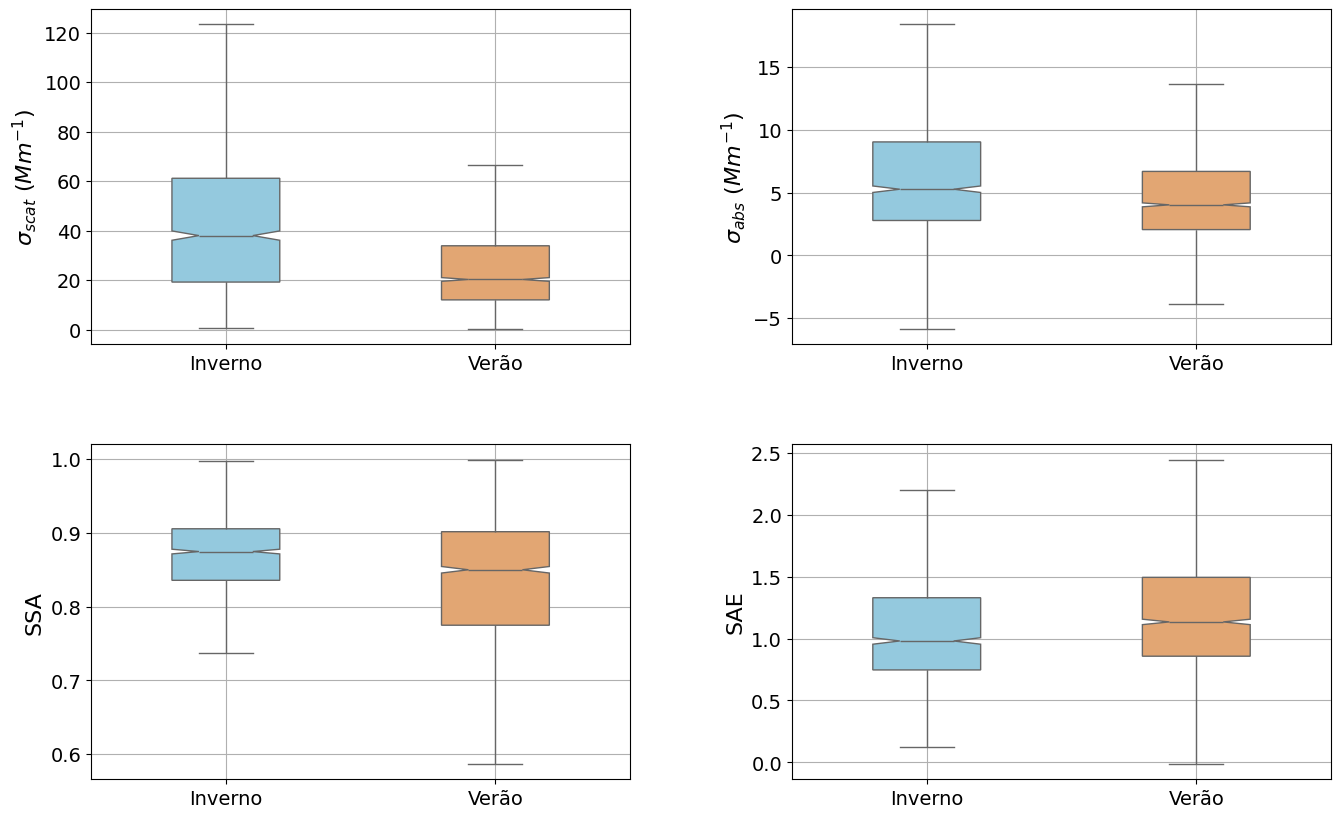

In [30]:
import seaborn as sns
# Preparando os dados para o Seaborn em formato de DataFrame
df_comparativo = pd.DataFrame({
    'Valores': np.concatenate([
        scat637_inverno_hora, scat637_verao_hora, 
        abs637_inverno_hora, abs637_verao_hora, 
        albedo_inverno_hora, albedo_verao_hora, 
        SAE_inverno_hora, SAE_verao_hora
    ]),
    'Métrica': (['$\sigma_{scat}~(Mm^{-1})$'] * len(scat637_inverno_hora) +
                ['$\sigma_{scat}~(Mm^{-1})$'] * len(scat637_verao_hora) +
                ['$\sigma_{abs}~(Mm^{-1})$'] * len(abs637_inverno_hora) +
                ['$\sigma_{abs}~(Mm^{-1})$'] * len(abs637_verao_hora) +
                ['SSA'] * len(albedo_inverno_hora) +
                ['SSA'] * len(albedo_verao_hora) +
                ['SAE'] * len(SAE_inverno_hora) +
                ['SAE'] * len(SAE_verao_hora)),
    'Período': (['Inverno'] * len(scat637_inverno_hora) + 
                ['Verão'] * len(scat637_verao_hora) +
                ['Inverno'] * len(abs637_inverno_hora) +
                ['Verão'] * len(abs637_verao_hora) +
                ['Inverno'] * len(albedo_inverno_hora) +
                ['Verão'] * len(albedo_verao_hora) +
                ['Inverno'] * len(SAE_inverno_hora) +
                ['Verão'] * len(SAE_verao_hora))
})

# Criando a matriz 2x2 de gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

metricas = ['$\sigma_{scat}~(Mm^{-1})$', '$\sigma_{abs}~(Mm^{-1})$', 'SSA', 'SAE']


for ax, metrica in zip(axes.ravel(), metricas):
    sns.boxplot(
        x='Período', 
        y='Valores', 
        hue='Período',  # Atribuindo o hue para evitar o aviso
        data=df_comparativo[df_comparativo['Métrica'] == metrica], 
        ax=ax,
        palette=['skyblue', 'sandybrown'], 
        width=0.4,  # Reduzindo a largura das caixas
        notch=True,
        showfliers=False
    )
    ax.set_ylabel(metrica, fontsize=16)
    ax.grid(True)
    ax.set_xlabel('', fontsize=18)
    ax.tick_params(axis='both', labelsize=14)
# Ajustando espaçamento interno entre os subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

## Reunião 04/02/2025

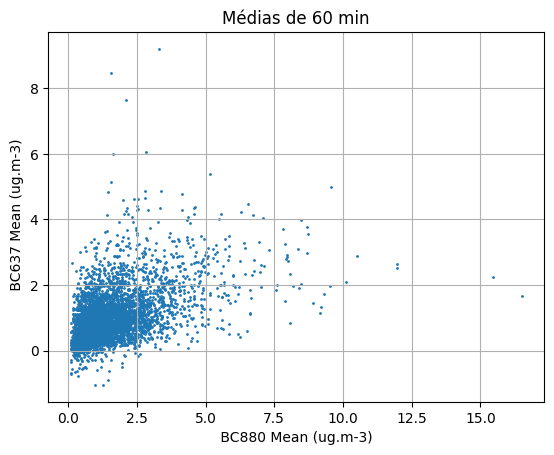

In [31]:
tempo = 60
x = aet[' BC880 Mean (ug.m-3)'].resample(f'{tempo}min').mean()
y = maap[' BC637 Mean (ug.m-3)'].resample(f'{tempo}min').mean()
indices_comuns = x.index.intersection(y.index)

# Filtrando os data sets para manter apenas os índices comuns
x = x.loc[indices_comuns]
y = y.loc[indices_comuns]



def plot_mais_R2(media,x, y,xlabel=x.name, ylabel=y.name ):
    plt.grid()
    plt.scatter(x,y,s=1)
    plt.title(f'Médias de {media} min')
    plt.xlabel(f'{xlabel} ')
    plt.ylabel(f'{ylabel}')
    plt.show()
plot_mais_R2(tempo,x, y,xlabel=x.name, ylabel=y.name )  

In [32]:
aet.columns

Index([' UnixTime(UTC)', ' BC370 Mean (ug.m-3)', ' BC470 Mean (ug.m-3)',
       ' BC520 Mean (ug.m-3)', ' BC590 Mean (ug.m-3)', ' BC660 Mean (ug.m-3)',
       ' BC880 Mean (ug.m-3)', ' BC950 Mean (ug.m-3)', ' BB Mean (percent)',
       ' abs370 Mean (Mm-1)', ' abs470 Mean (Mm-1)', ' abs520 Mean (Mm-1)',
       ' abs590 Mean (Mm-1)', ' abs660 Mean (Mm-1)', ' abs880 Mean (Mm-1)',
       ' abs950 Mean (Mm-1)', ' abs637 Mean (Mm-1)', ' AAE Mean (adim)', ' ',
       'AAE', 'sigma_AAE'],
      dtype='object')

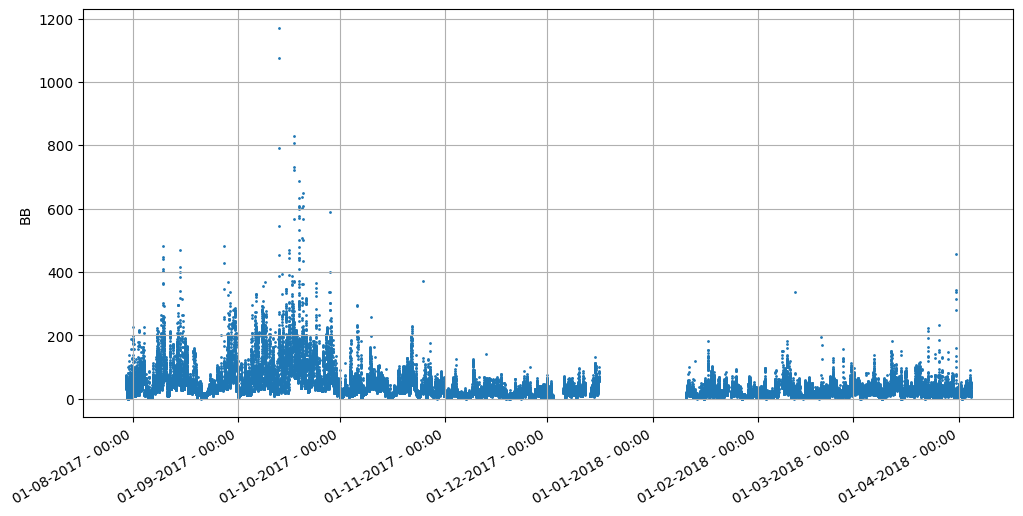

In [33]:
plt.figure(figsize=(12, 6))
plt.scatter(aet.index,aet[' BB Mean (percent)'] ,s=1)

plt.ylabel('BB')

# Formatando o eixo X para mostrar a nefe e hora
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y - %H:%M'))
plt.gcf().autofmt_xdate()  # Rotaciona os rótulos do eixo X para melhor legibilidade

#plt.legend()  # Mostra a legenda
plt.grid()  # Adiciona a grade ao gráfico
plt.show()


O que significa percent?

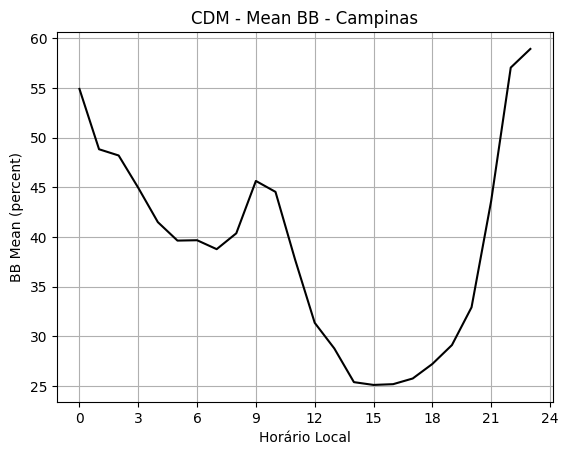

In [34]:

plt.plot(aet_cdm.index, aet_cdm[' BB Mean (percent)'],color='k')
plt.ylabel('BB Mean (percent)')
plt.xticks(np.arange(0, 24.001,3))
plt.xlabel('Horário Local')
plt.title('CDM - Mean BB - Campinas')
plt.grid()
plt.show()

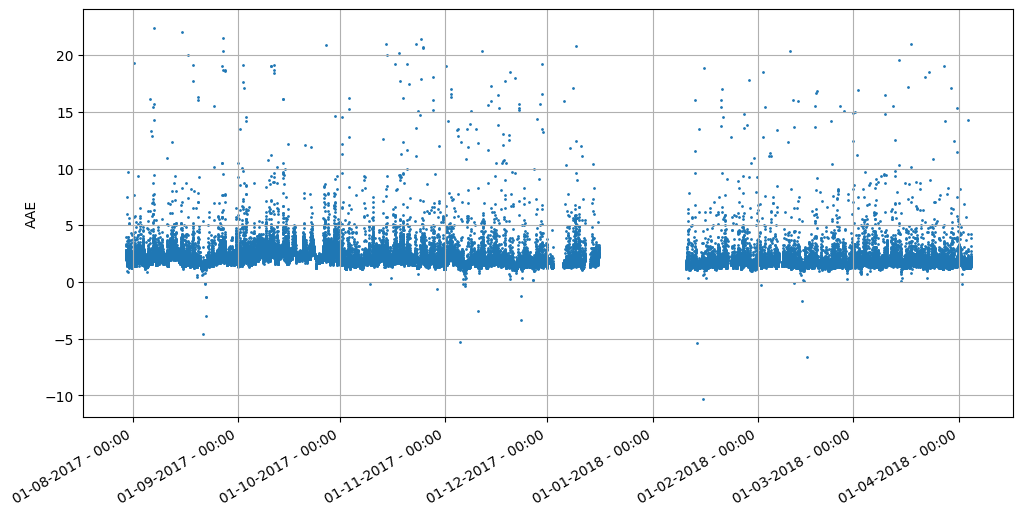

In [35]:
plt.figure(figsize=(12, 6))
plt.scatter(aet.index,aet['AAE'] ,s=1)

plt.ylabel('AAE')

# Formatando o eixo X para mostrar a nefe e hora
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y - %H:%M'))
plt.gcf().autofmt_xdate()  # Rotaciona os rótulos do eixo X para melhor legibilidade

#plt.legend()  # Mostra a legenda
plt.grid()  # Adiciona a grade ao gráfico
plt.show()

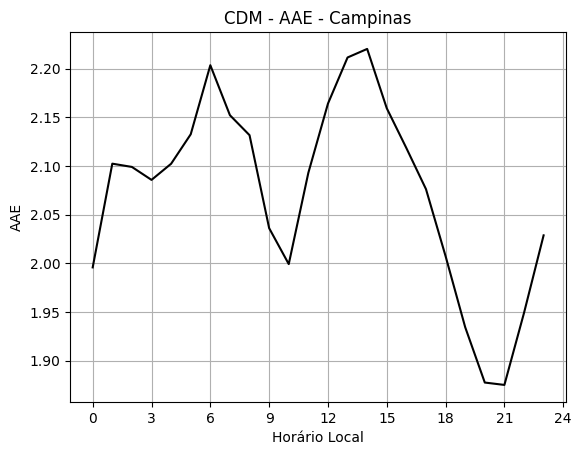

In [36]:
plt.plot(aet_cdm.index, aet_cdm['AAE'],color='k')
plt.ylabel('AAE')
plt.xticks(np.arange(0, 24.001,3))
plt.xlabel('Horário Local')
plt.title('CDM - AAE - Campinas')
plt.grid()

plt.show()

[-2.51762154]


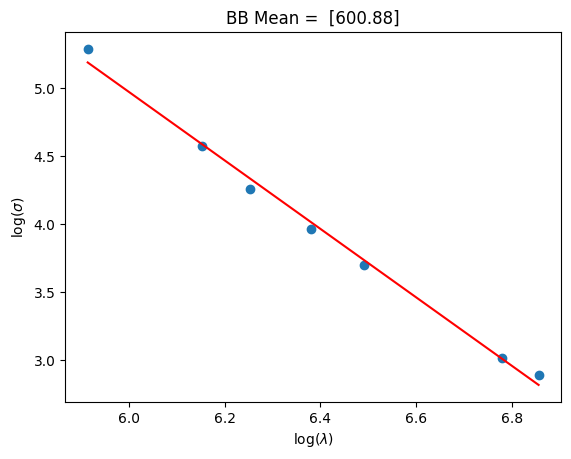

-1.794069577498755


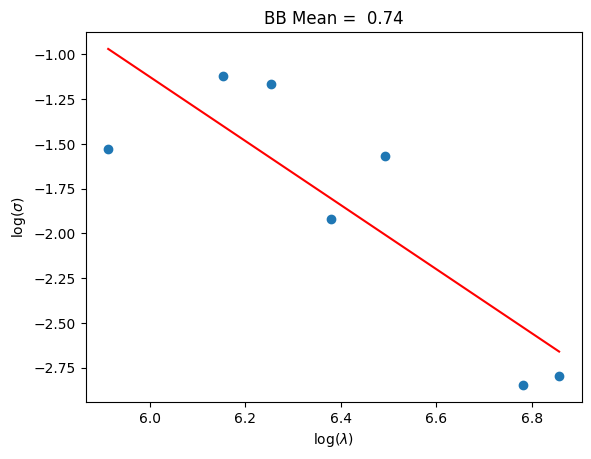

In [37]:
dados_valores_altos_BB = aet[(aet[' BB Mean (percent)'] > 600) & (aet[' BB Mean (percent)'] <601) ]
dados_valores_baixos_BB = aet[(aet[' BB Mean (percent)'] > 0.0) & (aet[' BB Mean (percent)'] <1) ].iloc[0]
def espectro_absorcao(dados,titulo):
   lambdas = np.array([370,470,520,590,660,880,950])
   sigmas = []
   for l in lambdas:
      sigmas.append(dados[f' abs{l} Mean (Mm-1)'])

   coeff, cov_matrix = np.polyfit(np.log(lambdas),np.log(sigmas), 1,cov= True)
   print(coeff[0])
   plt.figure()

   plt.plot(np.log(lambdas),coeff[1] + coeff[0]*np.log(lambdas),color='red')
   plt.scatter(np.log(lambdas),np.log(sigmas))
   plt.xlabel('log($\lambda$)')
   plt.ylabel('log($\sigma$)')
   plt.title(f'BB Mean =  {titulo}')
   plt.show()

espectro_absorcao(dados_valores_altos_BB,dados_valores_altos_BB[' BB Mean (percent)'].values)
espectro_absorcao(dados_valores_baixos_BB,dados_valores_baixos_BB[' BB Mean (percent)'])      

## Reunião 13/02/2025

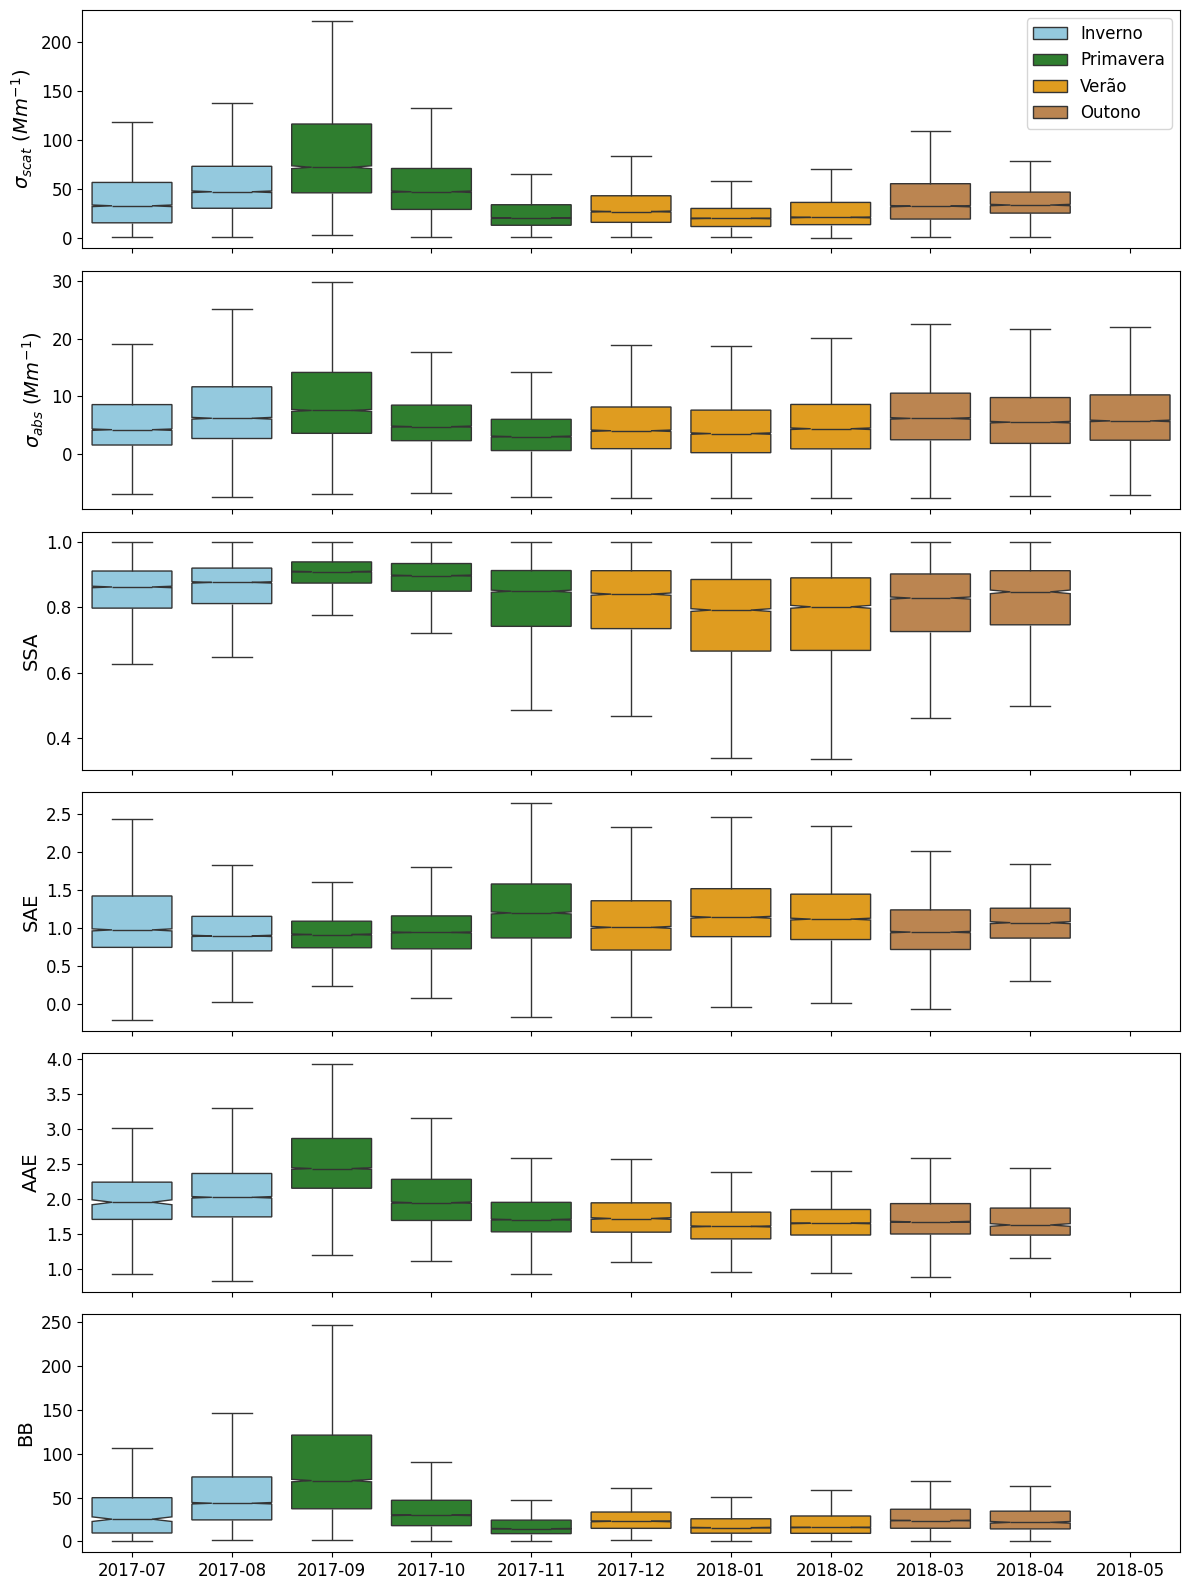

In [38]:
# Lista com (DataFrame, coluna, rótulo do eixo Y, título)
dados = [
    (nefe, ' scat637 Mean (Mm-1)', '$\sigma_{scat}~(Mm^{-1})$', 'Espalhamento'),
    (maap, ' Abs637 Mean (Mm-1)', '$\sigma_{abs}~(Mm^{-1})$', 'Absorção'),
    (nefe, ' SSA637 Mean (adim)', 'SSA', 'Albedo'),
    (nefe, ' Angstrom_powerlawfit Mean (prct)', 'SAE', 'SAE'),
    (aet, ' AAE Mean (adim)', 'AAE', 'AAE'),
    (aet, ' BB Mean (percent)', 'BB', 'BB'),
]

# Criando a figura e os subplots (5 linhas, 1 coluna)
fig, axes = plt.subplots(6, 1, figsize=(12, 16), sharex=True)

# Loop para criar cada boxplot
for i, (df, col, ylabel, title) in enumerate(dados):
    df = df.copy()  # Evita modificar o DataFrame original
    df['month'] = pd.to_datetime(df.index).strftime('%Y-%m')  # Certifica que o índice é datetime
    
    # Criando categorias de cores para os meses
    df['season'] = df.index.month.map(lambda m: 
                                      'Verão' if m in [12, 1, 2] else 
                                      'Inverno' if m in [6, 7, 8] else 
                                      'Outono' if m in [3, 4, 5] else
                                      'Primavera')
    df = df[df['month']!='2017-06']
    # Criando boxplot com cores personalizadas
    sns.boxplot(x='month', y=col, data=df, hue='season', 
                palette={'Verão': 'orange', 'Inverno': 'skyblue', 'Outono': 'peru', 'Primavera': 'forestgreen'}, 
                dodge=False, notch=True, showfliers=False, ax=axes[i])
    
    axes[i].set_xlabel('')  # Remove o nome do eixo X
    axes[i].set_ylabel(ylabel, fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)
    axes[i].tick_params(axis='x', rotation=0)  # Rotaciona os meses
    if i == 0:
        axes[i].legend( fontsize=12)
    else:
        axes[i].legend().set_visible(False)  # Oculta a legenda nos demais

# Ajustando o layout
plt.tight_layout()
#plt.legend()
plt.show()


### Wilcoxon rank-sum

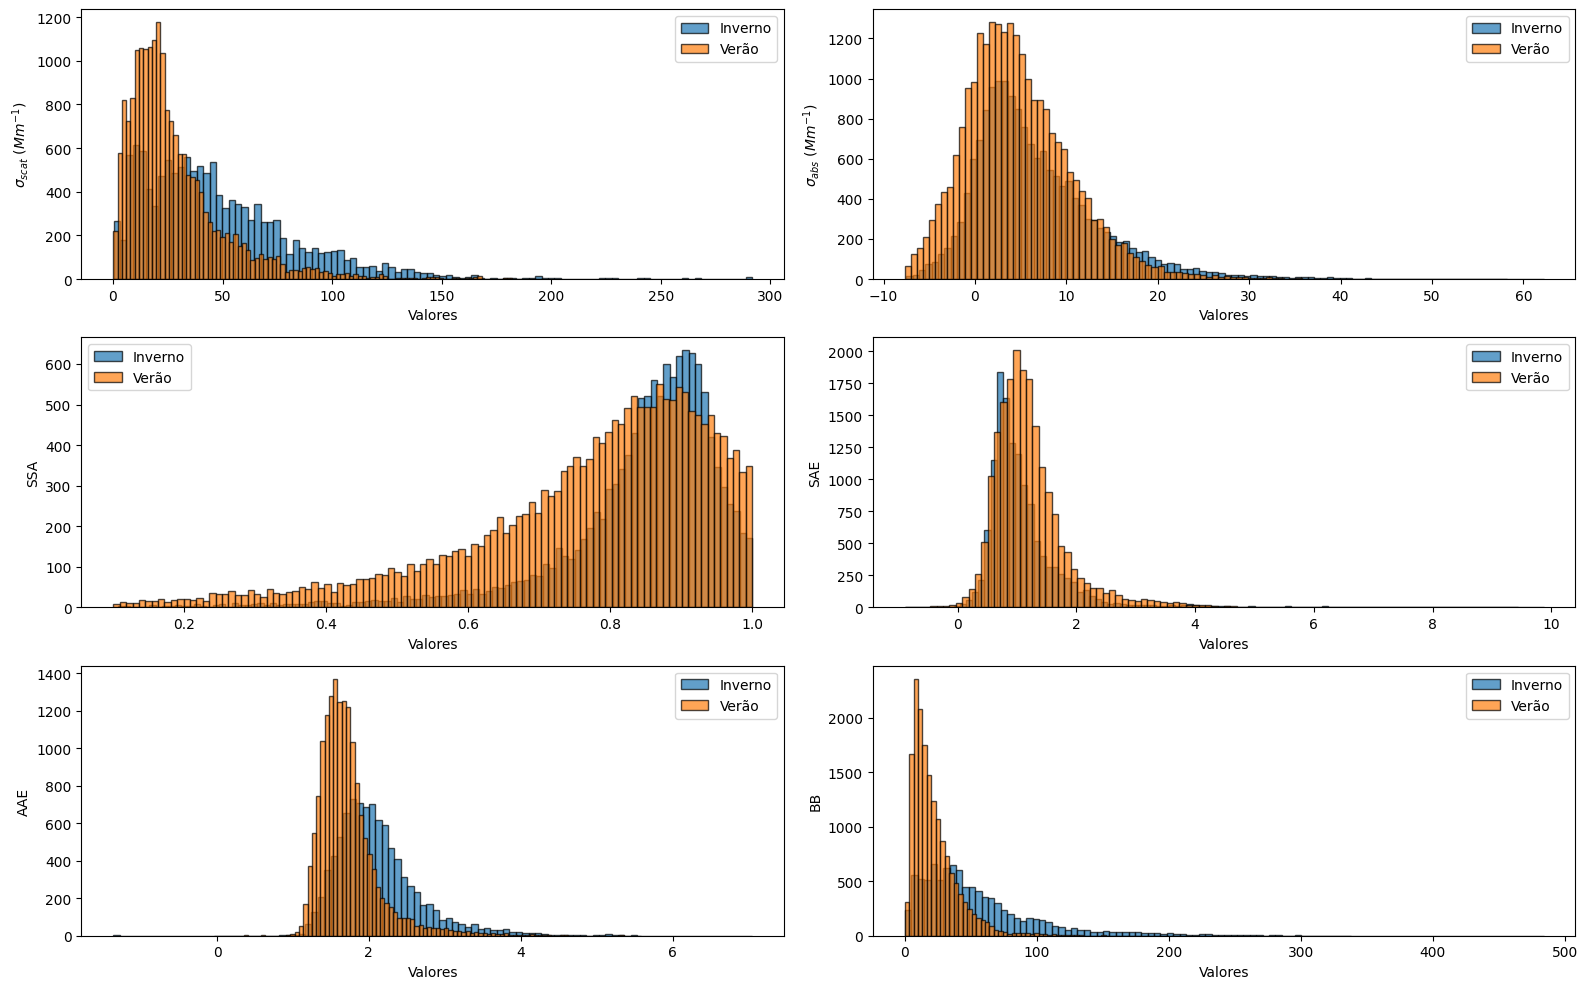

In [39]:
dados = [
    (nefe_verao,nefe_inverno, ' scat637 Mean (Mm-1)', '$\sigma_{scat}~(Mm^{-1})$', 'Espalhamento'),
    (maap_verao,maap_inverno, ' Abs637 Mean (Mm-1)', '$\sigma_{abs}~(Mm^{-1})$', 'Absorção'),
    (nefe_verao,nefe_inverno, ' SSA637 Mean (adim)', 'SSA', 'Albedo'),
    (nefe_verao,nefe_inverno, ' Angstrom_powerlawfit Mean (prct)', 'SAE', 'SAE'),
    (aet_verao,aet_inverno, ' AAE Mean (adim)', 'AAE', 'AAE'),
    (aet_verao,aet_inverno, ' BB Mean (percent)', 'BB', 'BB'),
]
# Cria a figura e os eixos
fig, axes = plt.subplots(3, 2, figsize=(16, 10))
flat_axes = axes.flatten()  # Transforma a matriz de eixos em uma lista plana

# Loop para plotar os histogramas nos 6 subplots
for i in range(6):
    df_verao,df_inverno, col,ylabel ,title= dados[i]
    dados_verao= df_verao['%s'%(col)]
    dados_inverno= df_inverno['%s'%(col)]
    ax = flat_axes[i]  # Pega o próximo eixo
    dados_inverno.plot(kind='hist', bins=100, edgecolor='black', alpha=0.7, ax=ax,label='Inverno')
    dados_verao.plot(kind='hist', bins=100, edgecolor='black', alpha=0.7, ax=ax,label='Verão')
    
    ax.set_xlabel('Valores')
    ax.set_ylabel(ylabel)
    ax.legend()

# Remove eixos extras (caso existam)
for j in range(i + 1, len(flat_axes)):
    fig.delaxes(flat_axes[j])

# Ajusta o espaçamento
plt.tight_layout()
plt.show()

In [40]:

from scipy.stats import mannwhitneyu
tempo = 1440
maap_verao_dia =  maap_verao.resample(f'{tempo}min').mean()
maap_inverno_dia =  maap_inverno.resample(f'{tempo}min').mean()

nefe_verao_dia =  nefe_verao.resample(f'{tempo}min').mean()
nefe_inverno_dia =  nefe_inverno.resample(f'{tempo}min').mean()

aet_verao_dia =  aet_verao.resample(f'{tempo}min').mean()
aet_inverno_dia =  aet_inverno.resample(f'{tempo}min').mean()

dados = [
    (nefe_verao_dia,nefe_inverno_dia, ' scat637 Mean (Mm-1)', '$\sigma_{scat}~(Mm^{-1})$', 'Espalhamento'),
    (maap_verao_dia,maap_inverno_dia, ' Abs637 Mean (Mm-1)', '$\sigma_{abs}~(Mm^{-1})$', 'Absorção'),
    (nefe_verao_dia,nefe_inverno_dia, ' SSA637 Mean (adim)', 'SSA', 'Albedo'),
    (nefe_verao_dia,nefe_inverno_dia, ' Angstrom_powerlawfit Mean (prct)', 'SAE', 'SAE'),
    (aet_verao_dia,aet_inverno_dia, ' AAE Mean (adim)', 'AAE', 'AAE'),
    (aet_verao_dia,aet_inverno_dia, ' BB Mean (percent)', 'BB', 'BB'),
]
for i, (df_verao,df_inverno, col, ylabel, title) in enumerate(dados):
    # Realizando o teste de Wilcoxon rank-sum
    stat, p_value = mannwhitneyu(df_verao['%s'%(col)], df_inverno['%s'%(col)],nan_policy='omit')
    print(title)
    # Exibindo os resultados
    print(f"Estatística do teste: {stat}")
    print(f"Valor-p: {p_value}")

    # Interpretando o resultado
    alpha = 0.05  # Nível de significância
    if p_value < alpha:
        print("Rejeitamos a hipótese nula: há uma diferença significativa entre as séries.")
    else:
        print("Não rejeitamos a hipótese nula: não há uma diferença significativa entre as séries.")

    print('\n \n')
        

Espalhamento
Estatística do teste: 1424.0
Valor-p: 1.7050504816851264e-07
Rejeitamos a hipótese nula: há uma diferença significativa entre as séries.

 

Absorção
Estatística do teste: 1951.0
Valor-p: 0.0016686854696074435
Rejeitamos a hipótese nula: há uma diferença significativa entre as séries.

 

Albedo
Estatística do teste: 1357.0
Valor-p: 4.318741008938807e-08
Rejeitamos a hipótese nula: há uma diferença significativa entre as séries.

 

SAE
Estatística do teste: 3594.0
Valor-p: 0.004925531777160715
Rejeitamos a hipótese nula: há uma diferença significativa entre as séries.

 

AAE
Estatística do teste: 241.0
Valor-p: 1.0060202919362983e-09
Rejeitamos a hipótese nula: há uma diferença significativa entre as séries.

 

BB
Estatística do teste: 304.0
Valor-p: 1.9540139737253387e-08
Rejeitamos a hipótese nula: há uma diferença significativa entre as séries.

 



### Intervalos

#### Primavera

In [42]:
nefe_primavera = nefe.loc[start_primavera:end_primavera]
maap_primavera = maap.loc[start_primavera:end_primavera]
dados = [
    (nefe_primavera, ' scat637 Mean (Mm-1)', '$\sigma_{scat}~(Mm^{-1})$', 'Espalhamento'),
    (maap_primavera, ' Abs637 Mean (Mm-1)', '$\sigma_{abs}~(Mm^{-1})$', 'Absorção'),
    (nefe_primavera, ' SSA637 Mean (adim)', 'SSA', 'Albedo'),

]
for i, (data, col, ylabel, title) in enumerate(dados):
    print(title)
    Q1 = data['%s'%(col)].quantile(0.25)
    Q3 = data['%s'%(col)].quantile(0.75)

    # Calculando o IQR
    IQR = Q3 - Q1

    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print()

Espalhamento
Q1: 21.50931222360937
Q3: 71.85507735678021
IQR: 50.34576513317084

Absorção
Q1: 1.96
Q3: 9.22
IQR: 7.260000000000001

Albedo
Q1: 0.83
Q3: 0.933
IQR: 0.10300000000000009



#### Verão

In [45]:
nefe_verao = nefe.loc[start_verao:end_verao]
maap_primavera = maap.loc[start_verao:end_verao]
dados = [
    (nefe_verao, ' scat637 Mean (Mm-1)', '$\sigma_{scat}~(Mm^{-1})$', 'Espalhamento'),
    (maap_verao, ' Abs637 Mean (Mm-1)', '$\sigma_{abs}~(Mm^{-1})$', 'Absorção'),
    (nefe_verao, ' SSA637 Mean (adim)', 'SSA', 'Albedo'),

]
for i, (data, col, ylabel, title) in enumerate(dados):
    print(title)
    Q1 = data['%s'%(col)].quantile(0.25)
    Q3 = data['%s'%(col)].quantile(0.75)

    # Calculando o IQR
    IQR = Q3 - Q1

    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print()
    Q1 = 0
    Q3 = 0

Espalhamento
Q1: 13.159395426774129
Q3: 36.251513134013024
IQR: 23.092117707238895

Absorção
Q1: 0.673
Q3: 8.072
IQR: 7.398999999999999

Albedo
Q1: 0.688
Q3: 0.899
IQR: 0.21100000000000008

